This one has a larger range over tan(beta) (max 20 -> 50), and other params

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['font.size'] = 24
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)

In [129]:
from common_plots import *

In [3]:
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv491_HBv431_HSv140_largeRange_02_May_16_1435.h5")
df_orig = store.full12loop_all
# df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly #'relaxed' constraints - +ve g-2 and omegah^2

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/tables/leaf.py:386: PerformanceWarning: The Leaf ``/full12loop_all/_i_table/constraints/sorted`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)


In [4]:
store.close()

In [5]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var
# df_pass_all_h1 = subset_var(df_pass_all, 122.1, 128.1, 'mh1')
# df_pass_all_h2 = subset_var(df_pass_all, 122.1, 128.1, 'mh2')
# df_pass_all_strict = df_pass_all[df_pass_all.constraints == ""]
# df_pass_all_strict_ma1Lt10 = df_pass_all_strict[df_pass_all_strict.ma1 <10]

In [6]:
df_orig_ma1 = subset_var(df_orig, 3.5, 10.5, 'ma1')

In [7]:
# print 'Original points (no constraints):', len(df_orig.index) 
# print 'With relaxed constraints (on g-2, relic density & some LHC constraints):', len(df_pass_all.index)
# print 'Relaxed constraints, ma1 < 10:', len(df_pass_all[df_pass_all.ma1<10])
# print 'Strictly enforcing all constraints in NMSSMTools 4.8.2:',len(df_pass_all_strict.index)
# print 'Strictly enforcing all constraints in NMSSMTools 4.8.2 with ma1 < 10:',len(df_pass_all_strict_ma1Lt10.index)

In [79]:
print 'Original points (no constraints):', len(df_orig.index) 
print 'With ma1 < 10.5:', len(df_orig_ma1.index)
print 'Passing every NT constraint:', len(df_orig[df_orig.constraints == ''].index)
# print 'Relaxed constraints, ma1 < 10:', len(df_pass_all[df_pass_all.ma1<10])
# print 'Strictly enforcing all constraints in NMSSMTools 4.8.2:',len(df_pass_all_strict.index)
# print 'Strictly enforcing all constraints in NMSSMTools 4.8.2 with ma1 < 10:',len(df_pass_all_strict_ma1Lt10.index)

 Original points (no constraints): 501828
With ma1 < 10.5: 24401
Passing every NT constraint: 0


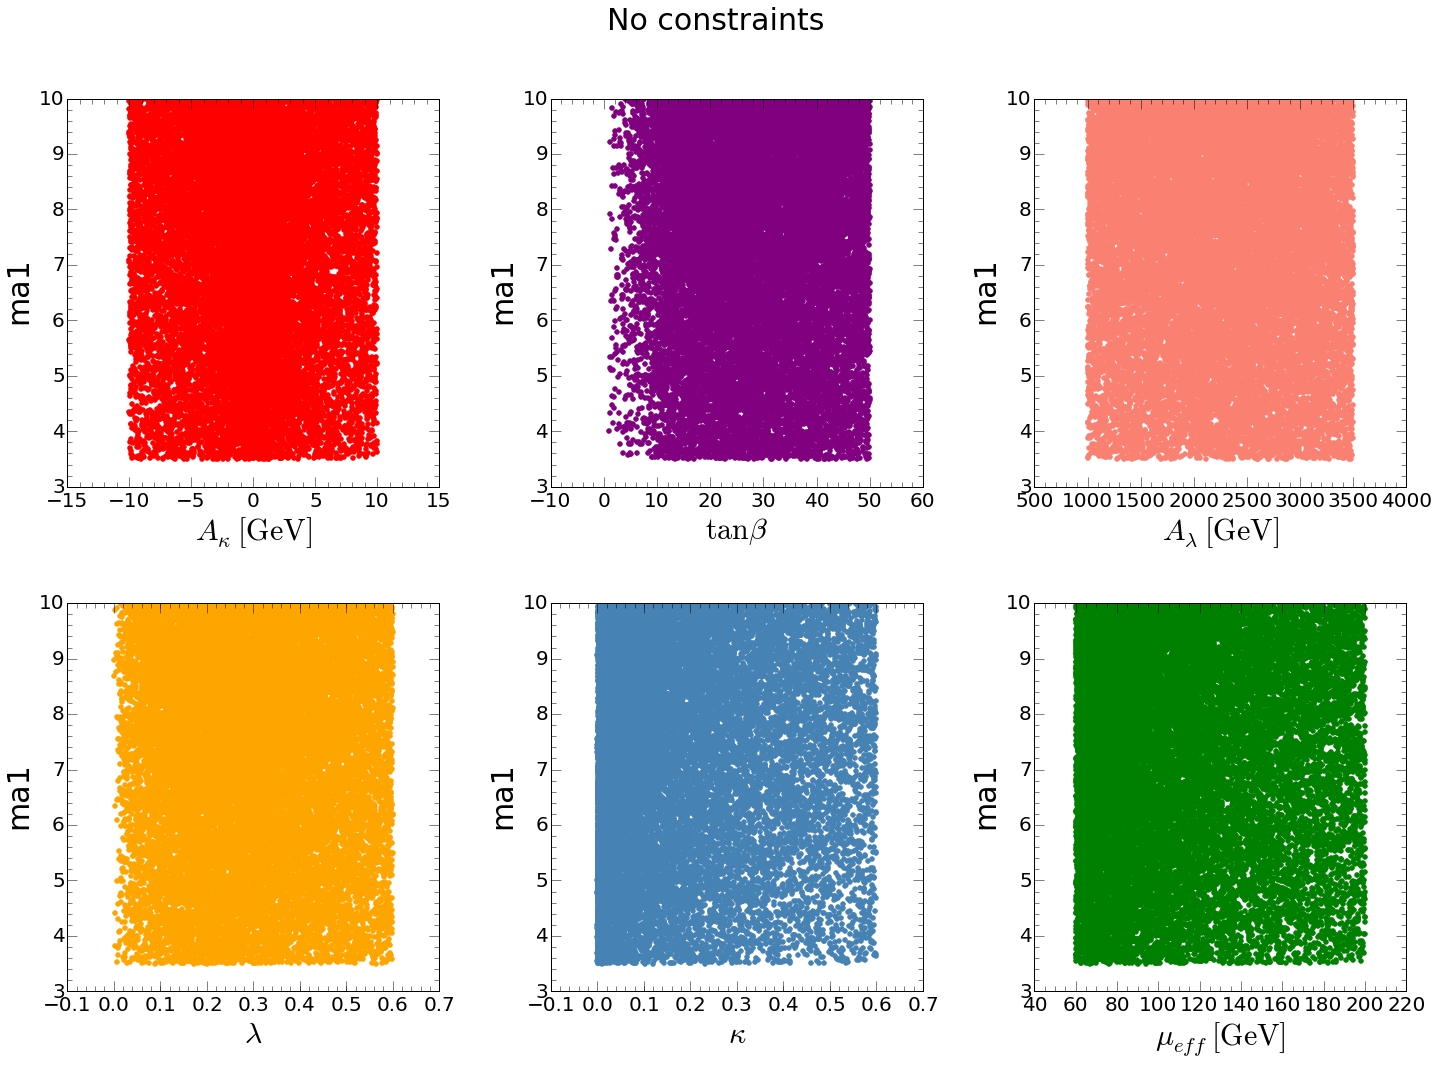

In [10]:
plot_input_params_scatters(df_orig_ma1, 'ma1', 'ma1', yrange=[3, 10], title='No constraints')

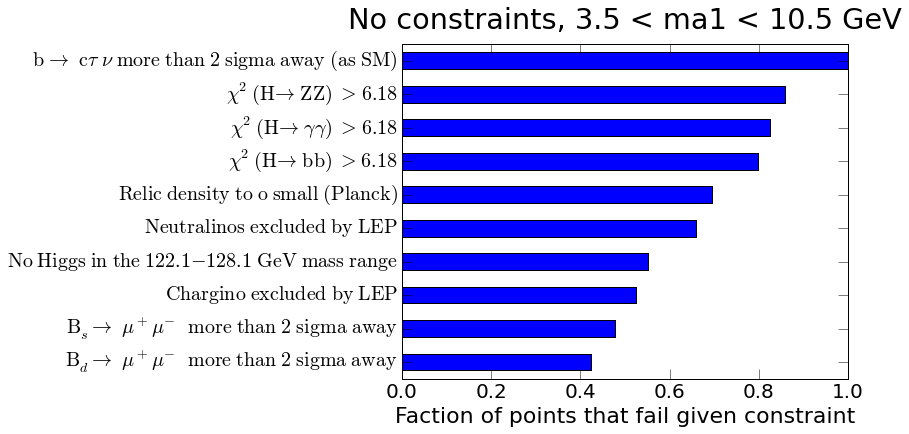

In [11]:
plot_constraints(df_orig_ma1, 'No constraints, 3.5 < ma1 < 10.5 GeV')

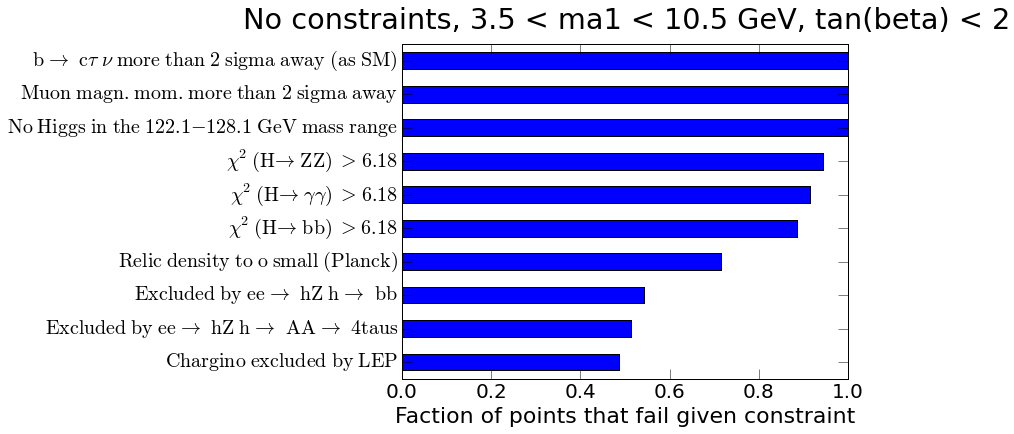

In [12]:
plot_constraints(df_orig_ma1.query('tgbeta <2'), 'No constraints, 3.5 < ma1 < 10.5 GeV, tan(beta) < 2')

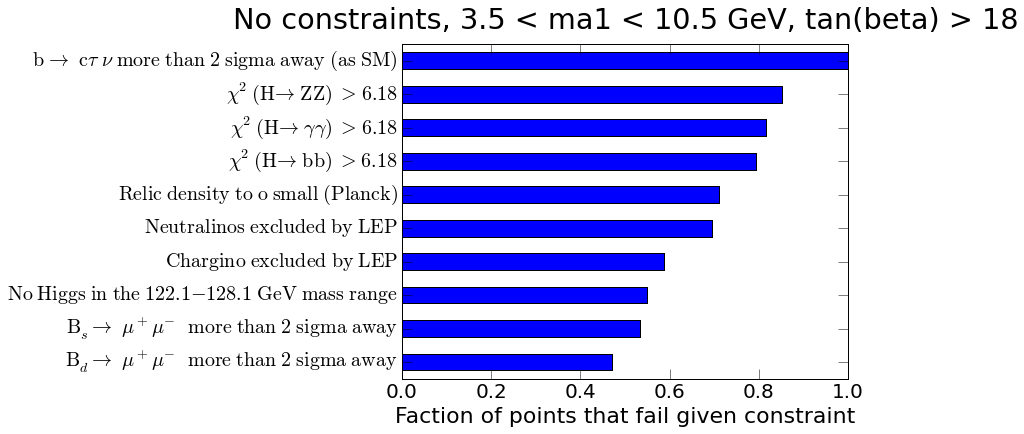

In [13]:
plot_constraints(df_orig_ma1.query('tgbeta >18'), 'No constraints, 3.5 < ma1 < 10.5 GeV, tan(beta) > 18')

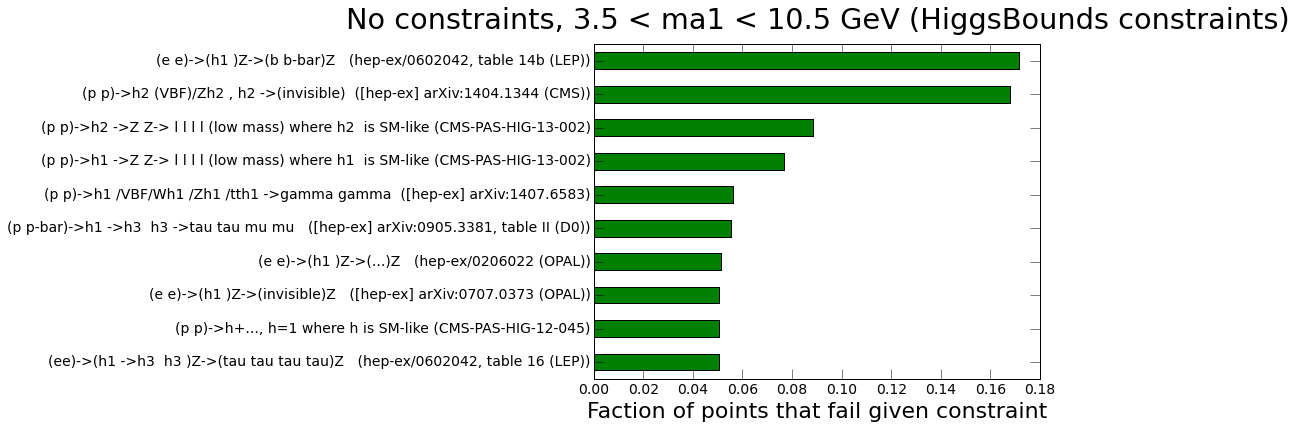

In [14]:
plot_constraints_HB(df_orig_ma1, 'No constraints, 3.5 < ma1 < 10.5 GeV (HiggsBounds constraints)')

(0, 500)

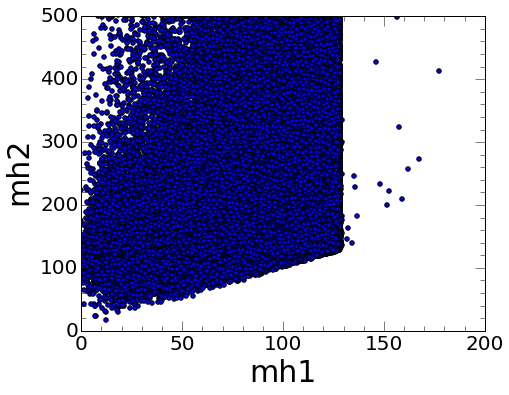

In [15]:
plot_scatter(df=df_orig, xvar='mh1', xlabel='mh1', yvar='mh2', ylabel='mh2')
plt.xlim(0, 200)
plt.ylim(0, 500)

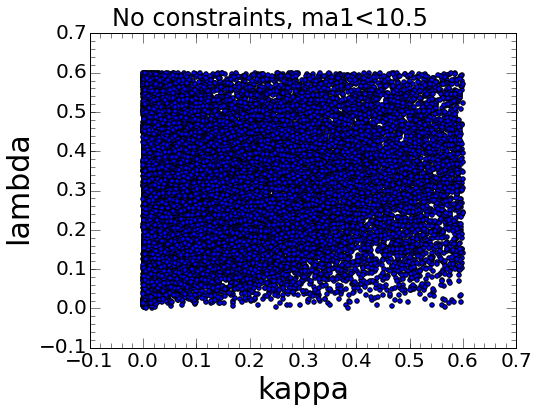

In [16]:
plot_scatter(df=df_orig_ma1, xvar='kappa', xlabel='kappa', yvar='lambda_', ylabel='lambda')
# plt.xlim(0, 200)
# plt.ylim(0, 500)
plt.suptitle('No constraints, ma1<10.5')

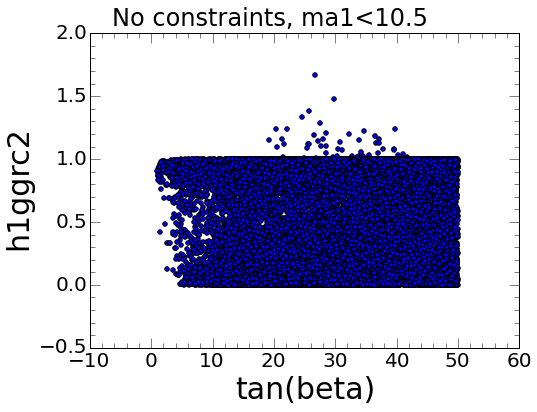

In [17]:
plot_scatter(df=df_orig_ma1, xvar='tgbeta', xlabel='tan(beta)', yvar='h1ggrc2', ylabel='h1ggrc2')
# plt.xlim(0, 200)
# plt.ylim(0, 500)
plt.suptitle('No constraints, ma1<10.5')

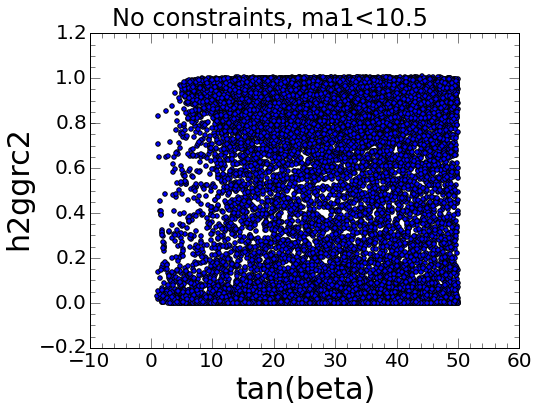

In [18]:
plot_scatter(df=df_orig_ma1, xvar='tgbeta', xlabel='tan(beta)', yvar='h2ggrc2', ylabel='h2ggrc2')
# plt.xlim(0, 200)
# plt.ylim(0, 500)
plt.suptitle('No constraints, ma1<10.5')

In [19]:
df_orig.columns

Index([u'Bra1bb', u'Bra1cc', u'Bra1gg', u'Bra1mumu', u'Bra1ss', u'Bra1tautau',
       u'Brh1a1a1', u'Brh1a1z', u'Brh1bb', u'Brh1cc',
       ...
       u'xsec_8_vbf_h2_2a1_4b', u'xsec_scaled_vbf_h2_2h1_4tau',
       u'xsec_13_vbf_h2_2h1_4tau', u'xsec_8_vbf_h2_2h1_4tau',
       u'xsec_scaled_vbf_h2_2h1_2b2tau', u'xsec_13_vbf_h2_2h1_2b2tau',
       u'xsec_8_vbf_h2_2h1_2b2tau', u'xsec_scaled_vbf_h2_2h1_4b',
       u'xsec_13_vbf_h2_2h1_4b', u'xsec_8_vbf_h2_2h1_4b'],
      dtype='object', length=147)

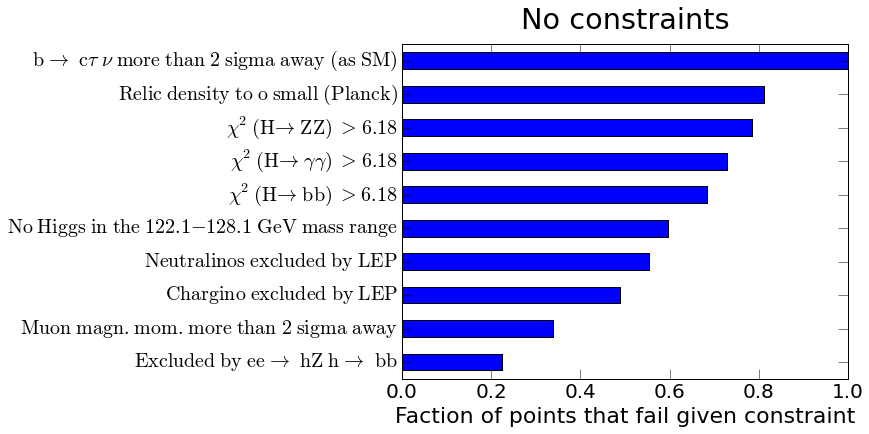

In [20]:
plot_constraints(df_orig, 'No constraints')

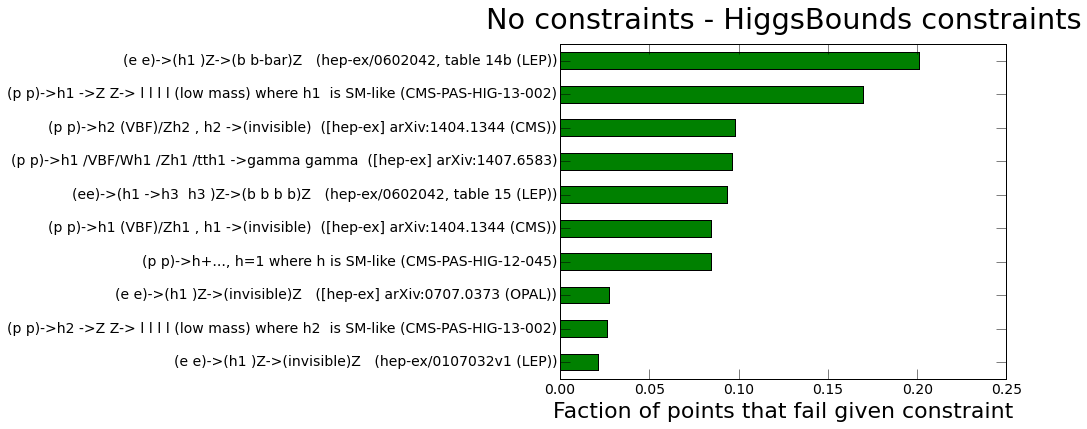

In [21]:
plot_constraints_HB(df_orig, 'No constraints - HiggsBounds constraints')

In [22]:
def safe_brackets(s):
    return s.replace("(", r"\(").replace(")", r"\)")

In [23]:
NT_constraints = [
    safe_brackets('chi2(H->gg) > 6.18'),
    safe_brackets('chi2(H->bb) > 6.18'),
    safe_brackets('chi2(H->ZZ) > 6.18')
]

HS_probs = [0, 0.05, 0.32]

In [24]:
constr_matrix = np.zeros(shape=(len(NT_constraints),len(HS_probs)))
print constr_matrix

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [25]:
df = df_orig
for ind, nt in enumerate(NT_constraints):
    for jnd, hs in enumerate(HS_probs):
        q_str = 'HSprob>%f' % hs
        df_nt_hb = df.query(q_str)[~df.constraints.str.contains(nt)]
        constr_matrix[ind][jnd] = len(df_nt_hb.index)

/Users/robina/.virtualenvs/NMSSMScan/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [26]:
constr_matrix

array([[ 109709.,   29216.,    1636.],
       [ 125086.,   31463.,    2289.],
       [  97365.,   26626.,    1281.]])

In [29]:
constr_matrix

array([[ 109709.,   29216.,    1636.],
       [ 125086.,   31463.,    2289.],
       [  97365.,   26626.,    1281.]])

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 7 Text xticklabel objects>)

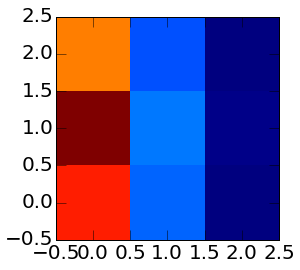

In [30]:
plt.imshow(constr_matrix, interpolation='nearest', origin='lower')
plt.xticks()

In [31]:
df_pass = df_orig[df_orig.constraints == "b -> c tau nu more than 2 sigma away (as SM)"]
print len(df_pass.index), "points passing everything but b -> c tau nu"

728 points passing everything but b -> c tau nu


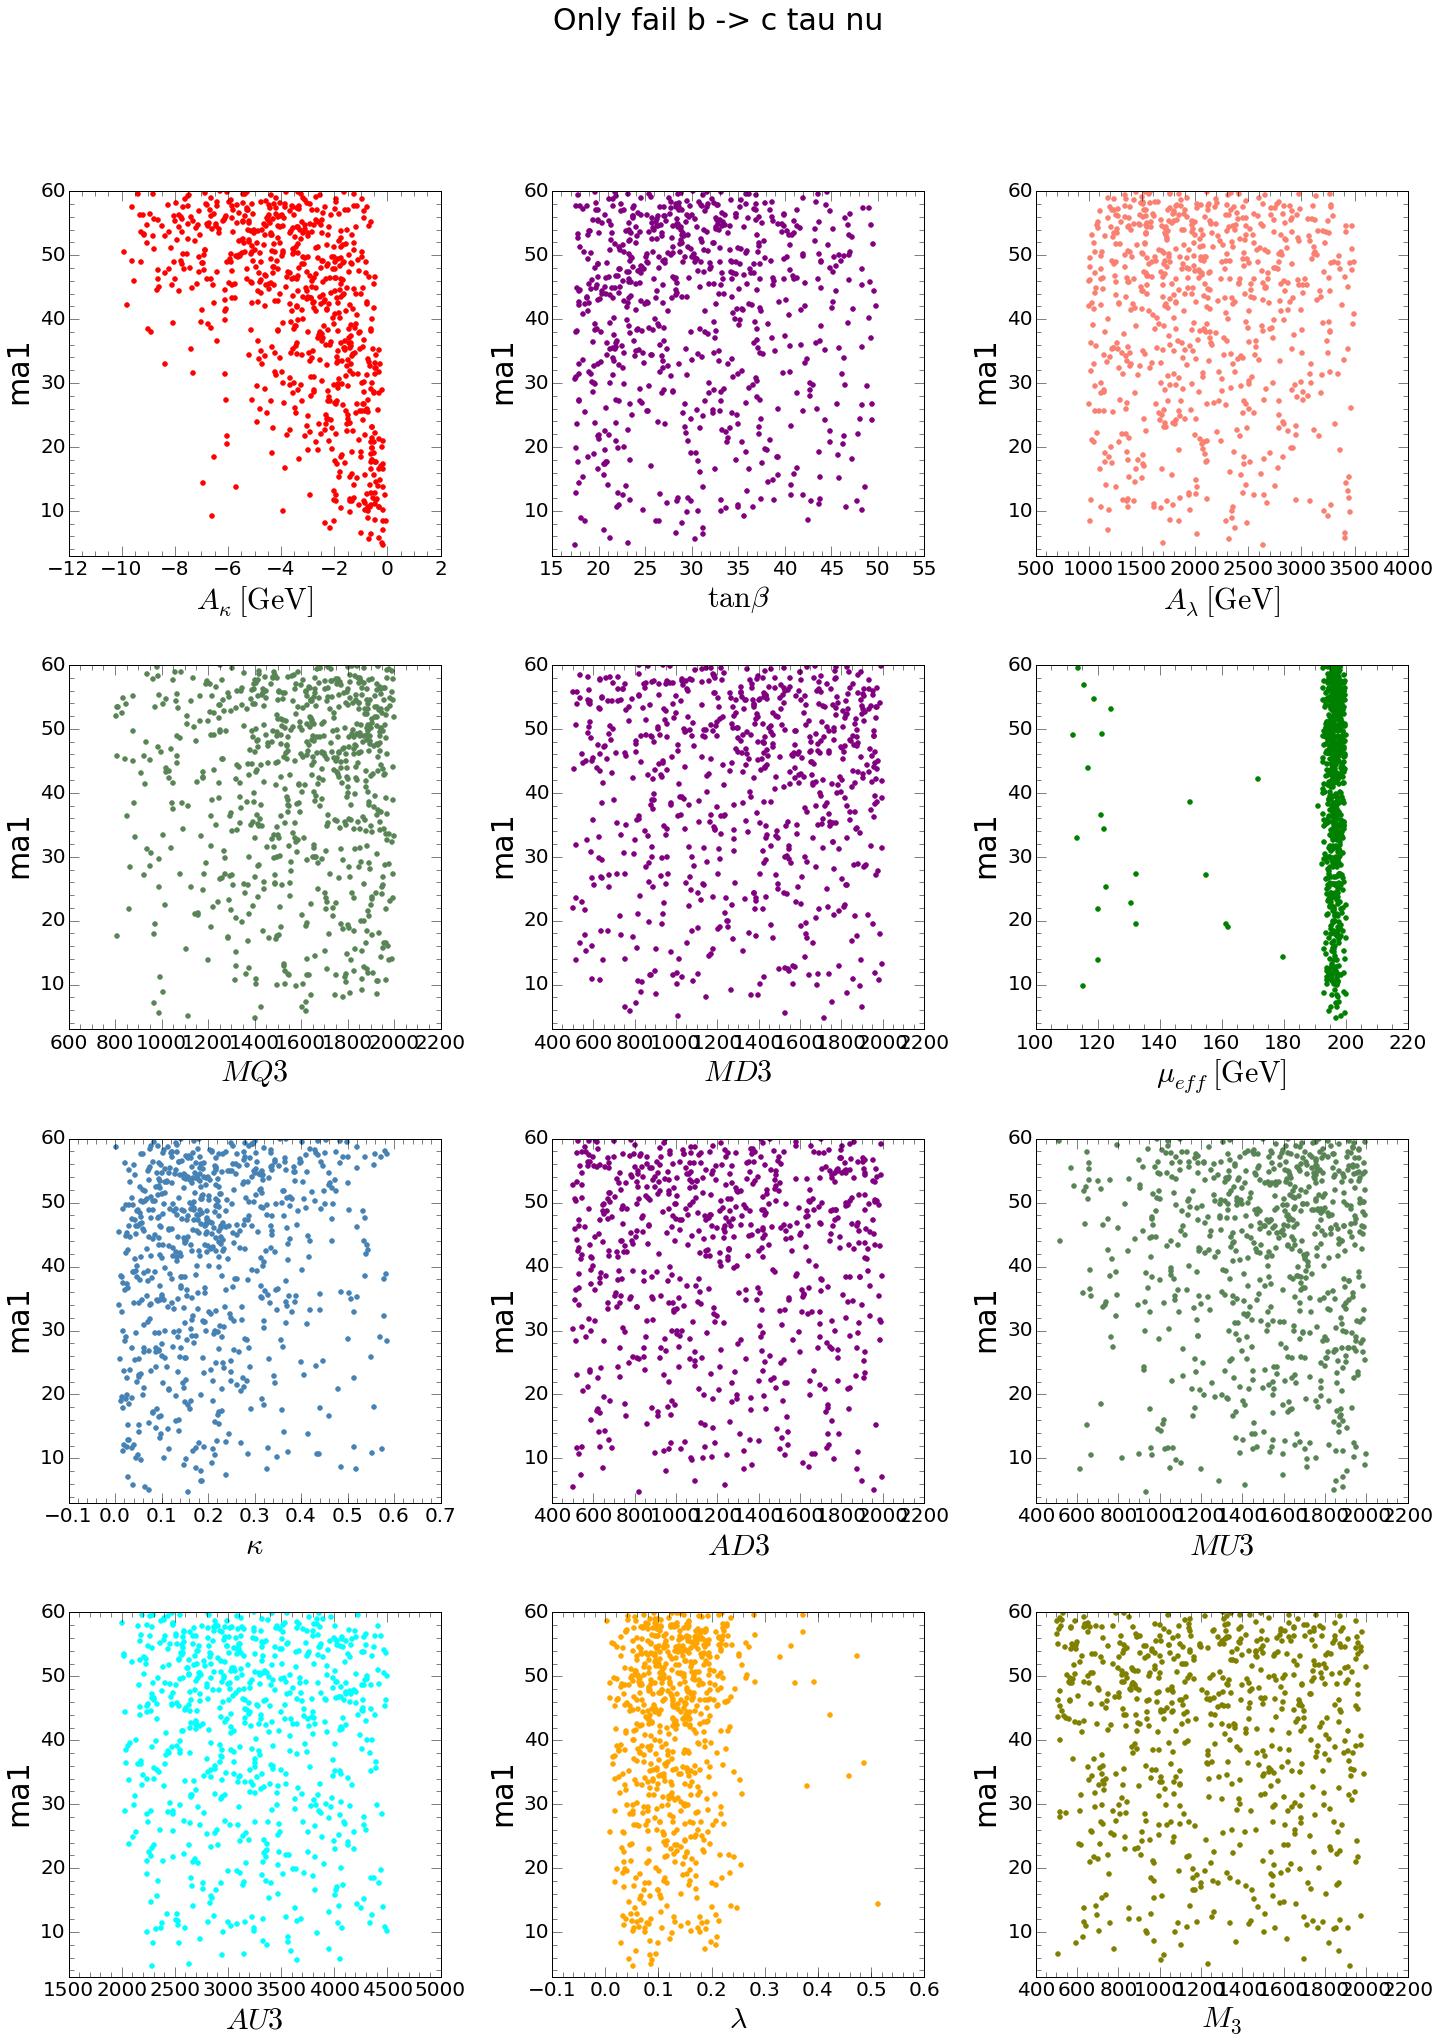

In [130]:
plot_input_params_scatters(df_pass, 'ma1', 'ma1', yrange=[3, 60], title='Only fail b -> c tau nu', 
                           param_dict=nmssm_params_extended)

In [84]:
df_pass.columns.values

array(['Bra1bb', 'Bra1cc', 'Bra1gg', 'Bra1mumu', 'Bra1ss', 'Bra1tautau',
       'Brh1a1a1', 'Brh1a1z', 'Brh1bb', 'Brh1cc', 'Brh1gammagamma',
       'Brh1gg', 'Brh1tautau', 'Brh1ww', 'Brh1zgamma', 'Brh1zz',
       'Brh2a1a1', 'Brh2a1z', 'Brh2bb', 'Brh2gammagamma', 'Brh2gg',
       'Brh2h1h1', 'Brh2tautau', 'Brh2ww', 'Brh2zgamma', 'Brh2zz',
       'Del_a_mu', 'HBchannel', 'HBobsratio', 'HBresult', 'HSprob', 'a0',
       'a1bbrc2', 'a1ggrc2', 'a1tautaurc2', 'ad3', 'akappa', 'alambda',
       'au3', 'bsgamma', 'bsmumu', 'btaunu', 'constraints', 'delmd',
       'delms', 'file', 'h1bbrc2', 'h1ggrc2', 'h1vvrc2', 'h2bbrc2',
       'h2ggrc2', 'h2vvrc2', 'h3bbrc2', 'h3ggrc2', 'h3vvrc2', 'kappa',
       'lambda_', 'm0', 'm12', 'm3', 'ma1', 'ma2', 'md3', 'mh1', 'mh2',
       'mh3', 'mhc', 'mq3', 'msbottom1', 'msbottom2', 'mstop1', 'mstop2',
       'mu3', 'mueff', 'omega', 'rd', 'rds', 'tgbeta', 'mass_ind_h1',
       'mass_ind_h2', 'mass_ind_h3', 'xsec_ggf13_h1', 'xsec_ggf13_h2',
       'xsec_ggf13

(0.001, 10.0)

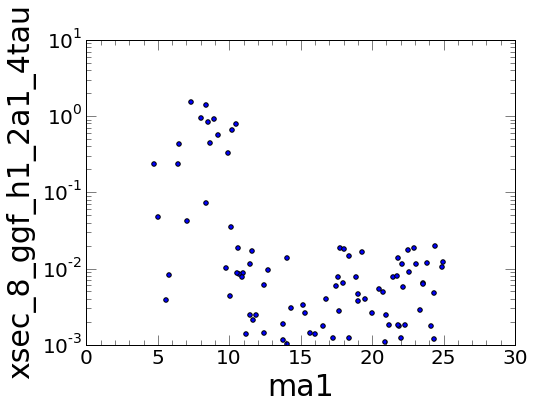

In [88]:
plot_scatter(df=df_pass.query('ma1<25'), yvar='xsec_8_ggf_h1_2a1_4tau', xvar='ma1')
plt.yscale('log')
plt.ylim(1E-3, 1E1)

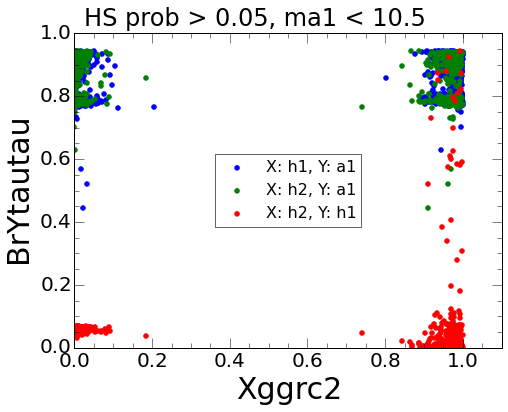

In [117]:
df = df_orig.query('HSprob>0.05')
plot_scatter(df=df.query('ma1<10.5'), xvar='h1ggrc2', yvar='Bra1tautau', color='blue', label='X: h1, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Bra1tautau', color='green', label='X: h2, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh1tautau', color='red', label='X: h2, Y: h1')
plt.xlabel('Xggrc2')
plt.ylabel('BrYtautau')
plt.ylim(0, 1)
plt.xlim(0, 1.1)
plt.legend(loc='center', fontsize=16)
plt.suptitle('HS prob > 0.05, ma1 < 10.5')

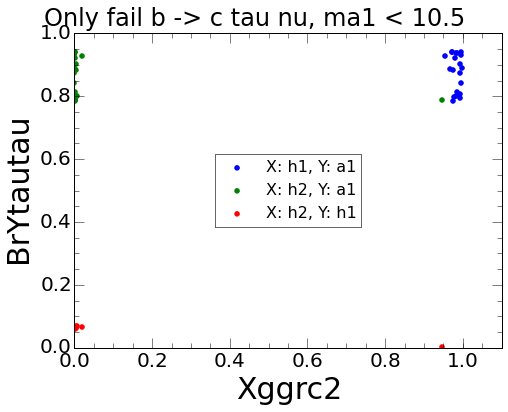

In [116]:
df = df_pass
plot_scatter(df=df.query('ma1<10.5'), xvar='h1ggrc2', yvar='Bra1tautau', color='blue', label='X: h1, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Bra1tautau', color='green', label='X: h2, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh1tautau', color='red', label='X: h2, Y: h1')
plt.xlabel('Xggrc2')
plt.ylabel('BrYtautau')
plt.ylim(0, 1)
plt.xlim(0, 1.1)
plt.legend(loc='center', fontsize=16)
plt.suptitle('Only fail b -> c tau nu, ma1 < 10.5')

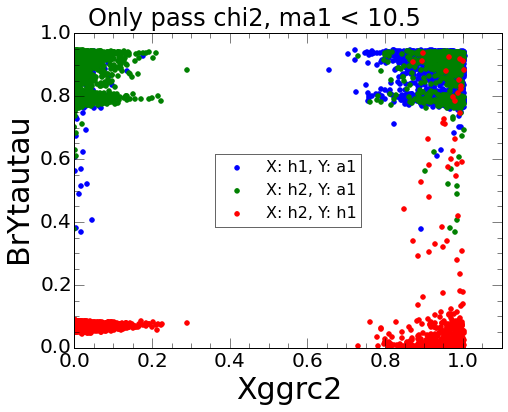

In [115]:
df = df_orig[~df_orig.constraints.str.contains('chi2')]
plot_scatter(df=df.query('ma1<10.5'), xvar='h1ggrc2', yvar='Bra1tautau', color='blue', label='X: h1, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Bra1tautau', color='green', label='X: h2, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh1tautau', color='red', label='X: h2, Y: h1')
plt.xlabel('Xggrc2')
plt.ylabel('BrYtautau')
plt.ylim(0, 1)
plt.xlim(0, 1.1)
plt.legend(loc='center', fontsize=16)
plt.suptitle('Only pass chi2, ma1 < 10.5')

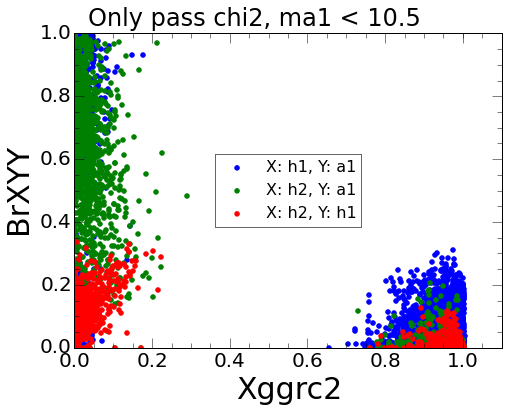

In [118]:
df = df_orig[~df_orig.constraints.str.contains('chi2')]
plot_scatter(df=df.query('ma1<10.5'), xvar='h1ggrc2', yvar='Brh1a1a1', color='blue', label='X: h1, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh2a1a1', color='green', label='X: h2, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh2h1h1', color='red', label='X: h2, Y: h1')
plt.xlabel('Xggrc2')
plt.ylabel('BrXYY')
plt.ylim(0, 1)
plt.xlim(0, 1.1)
plt.legend(loc='center', fontsize=16)
plt.suptitle('Only pass chi2, ma1 < 10.5')

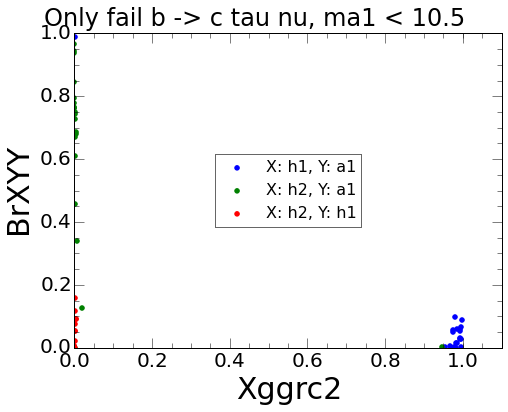

In [119]:
df = df_pass
plot_scatter(df=df.query('ma1<10.5'), xvar='h1ggrc2', yvar='Brh1a1a1', color='blue', label='X: h1, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh2a1a1', color='green', label='X: h2, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh2h1h1', color='red', label='X: h2, Y: h1')
plt.xlabel('Xggrc2')
plt.ylabel('BrXYY')
plt.ylim(0, 1)
plt.xlim(0, 1.1)
plt.legend(loc='center', fontsize=16)
plt.suptitle('Only fail b -> c tau nu, ma1 < 10.5')

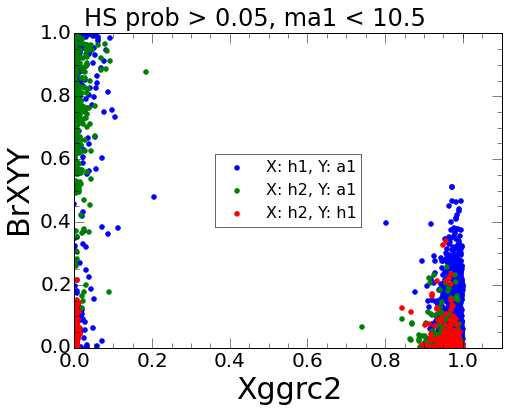

In [120]:
df = df_orig.query('HSprob>0.05')
plot_scatter(df=df.query('ma1<10.5'), xvar='h1ggrc2', yvar='Brh1a1a1', color='blue', label='X: h1, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh2a1a1', color='green', label='X: h2, Y: a1')
plot_scatter(ax=plt.gca(), df=df.query('ma1<10.5'), xvar='h2ggrc2', yvar='Brh2h1h1', color='red', label='X: h2, Y: h1')
plt.xlabel('Xggrc2')
plt.ylabel('BrXYY')
plt.ylim(0, 1)
plt.xlim(0, 1.1)
plt.legend(loc='center', fontsize=16)
plt.suptitle('HS prob > 0.05, ma1 < 10.5')

**The b -> c tau nu failing constraints**

RD = BR[B+ -> D tau+ nu_tau]/BR[B+ -> D l+ nu_l]

RD: Exp. 2 Sigma: 2.91E-1 < RD < 4.91E-1:

RD* = BR[B+ -> D* tau+ nu_tau]/BR[B+ -> D* l+ nu_l]

RD\*: Exp. 2 Sigma: 2.78E-1 < RD* < 3.66E-1:

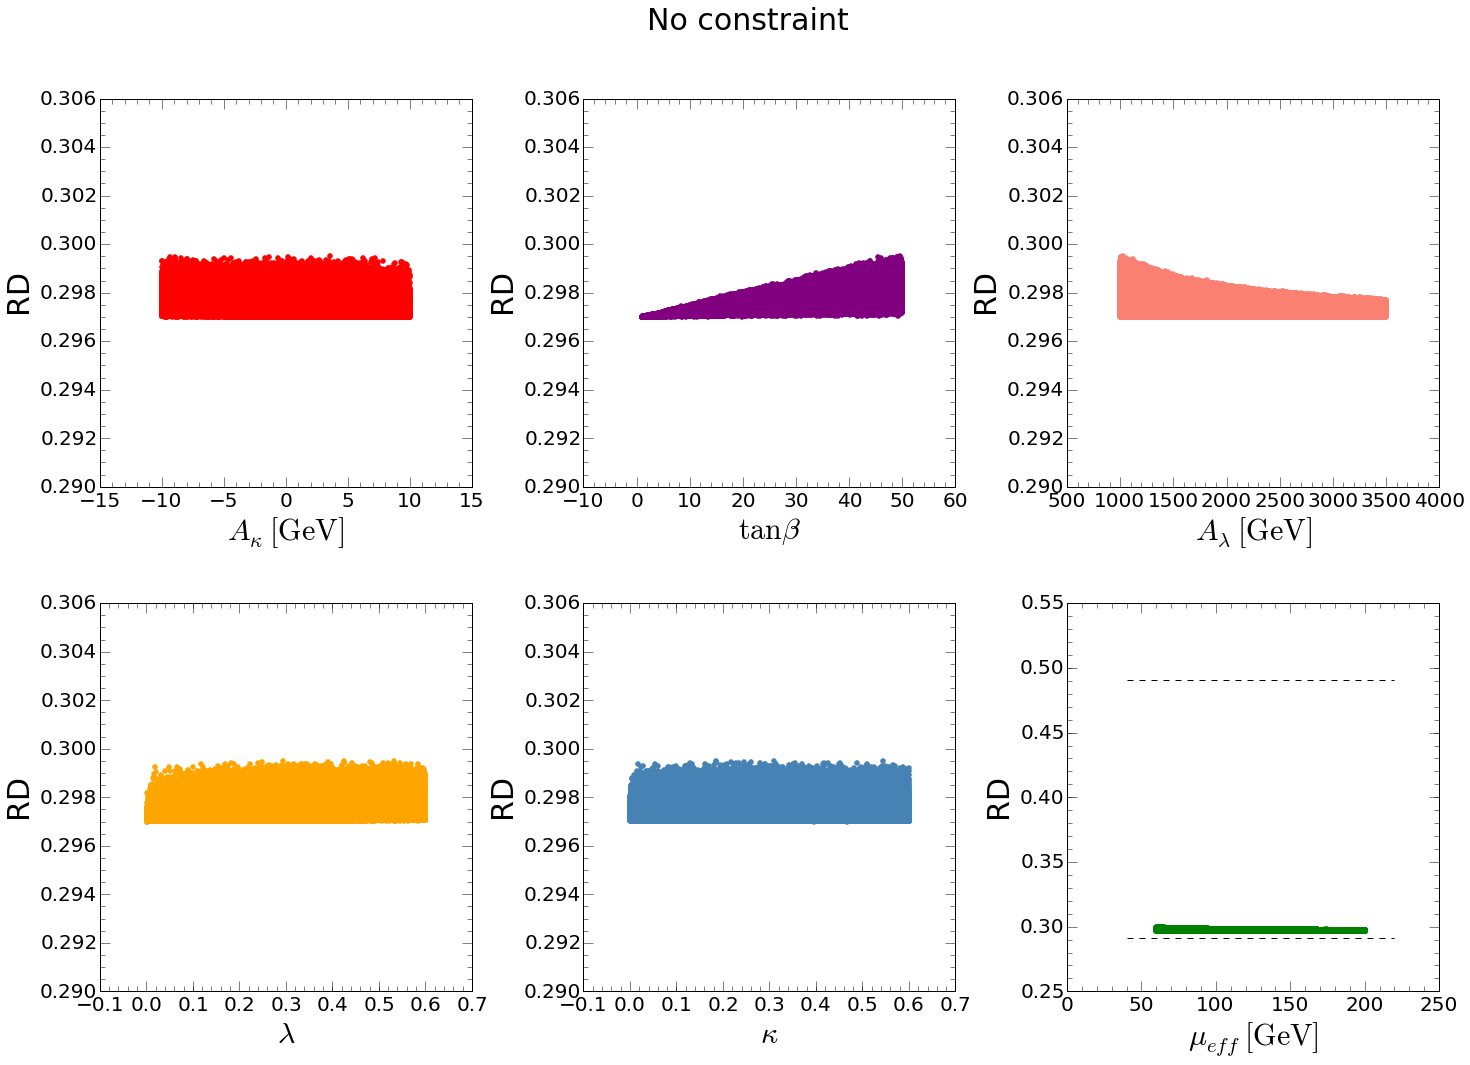

In [33]:
plot_input_params_scatters(df_orig, 
                           'rd', 'RD', title='No constraint')
plt.hlines([2.91E-1, 4.91E-1], *plt.xlim(), linestyle='dashed')

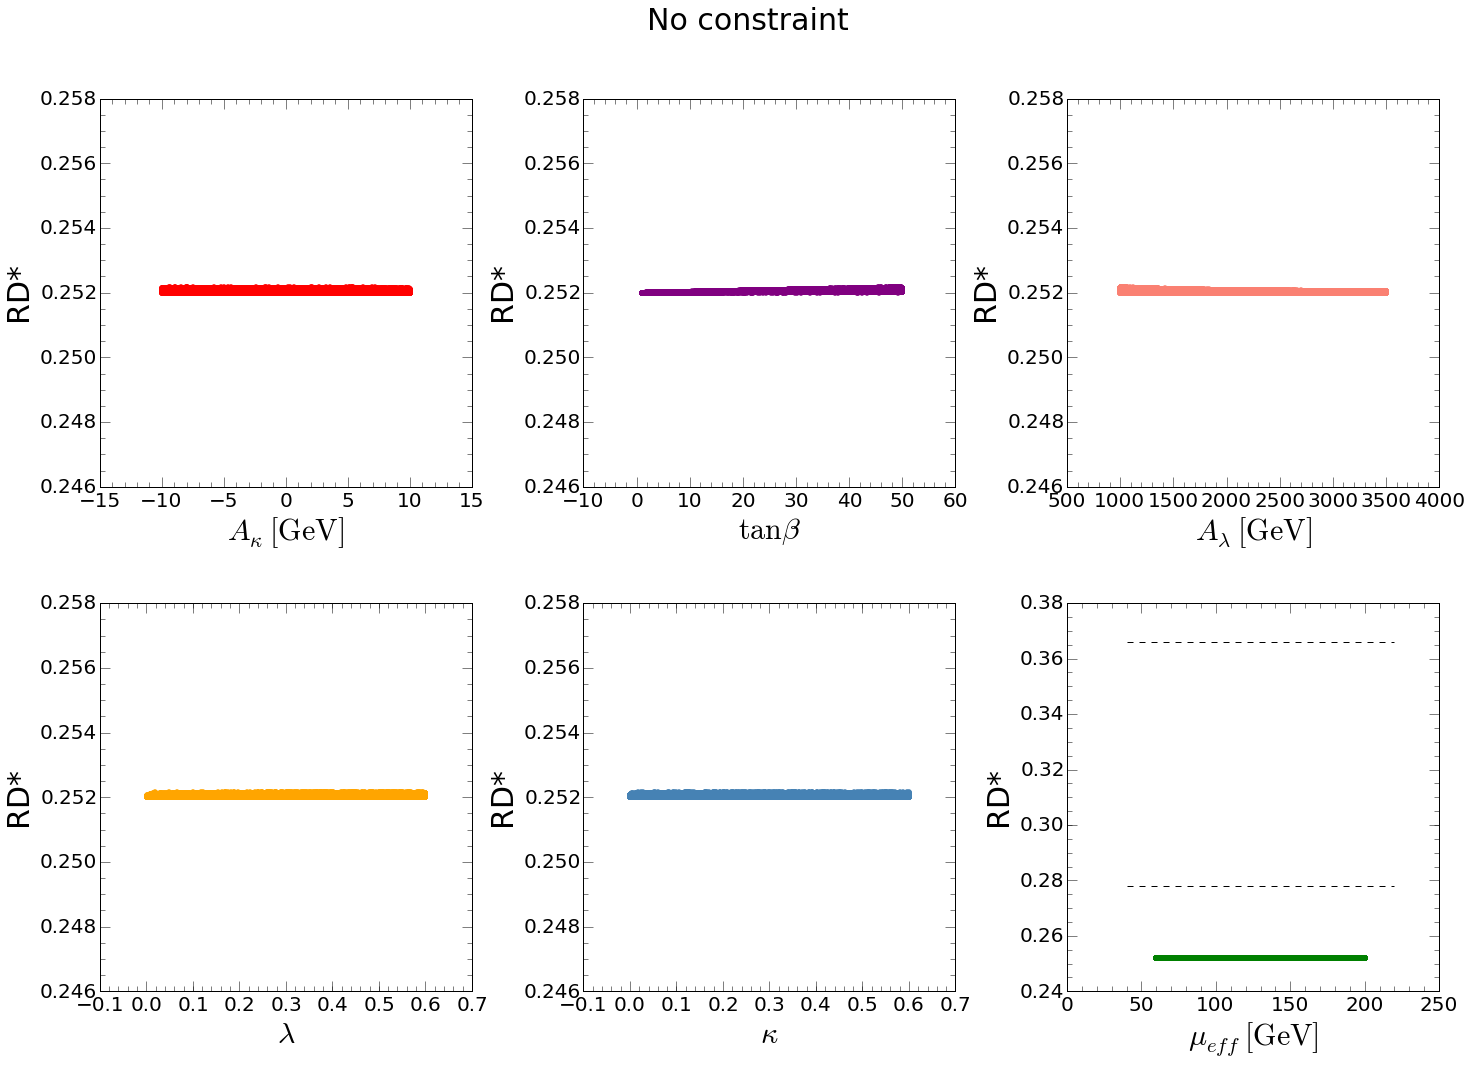

In [34]:
plot_input_params_scatters(df_orig, 
                           'rds', 'RD*', title='No constraint')
plt.hlines([2.78E-1, 3.66E-1], *plt.xlim(), linestyle='dashed')

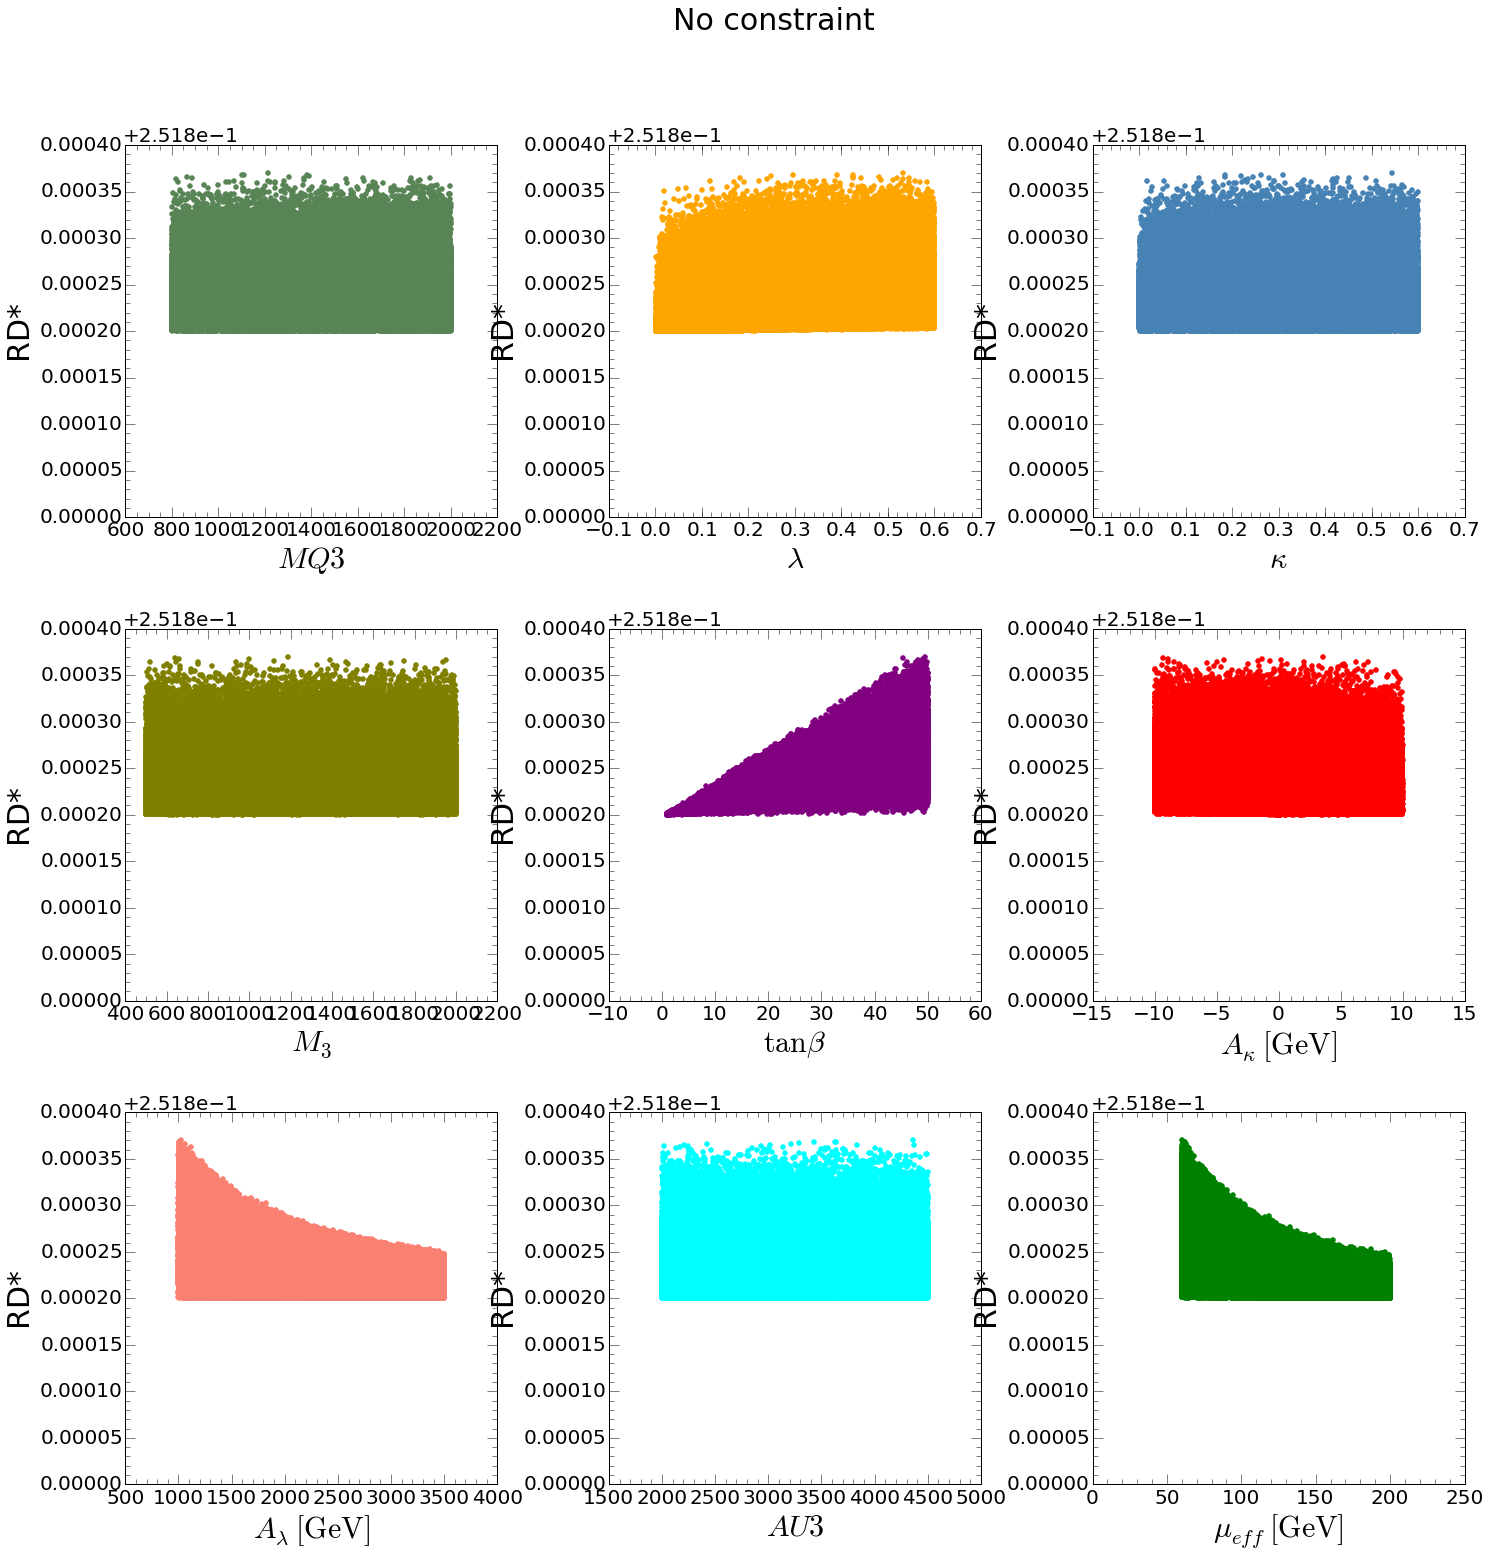

In [35]:
plot_input_params_scatters(df_orig, 
                           'rds', 'RD*', title='No constraint', param_dict=nmssm_params_extended, 
                           yrange=[0.2518, 0.2522])
plt.hlines([2.78E-1, 3.66E-1], *plt.xlim(), linestyle='dashed')

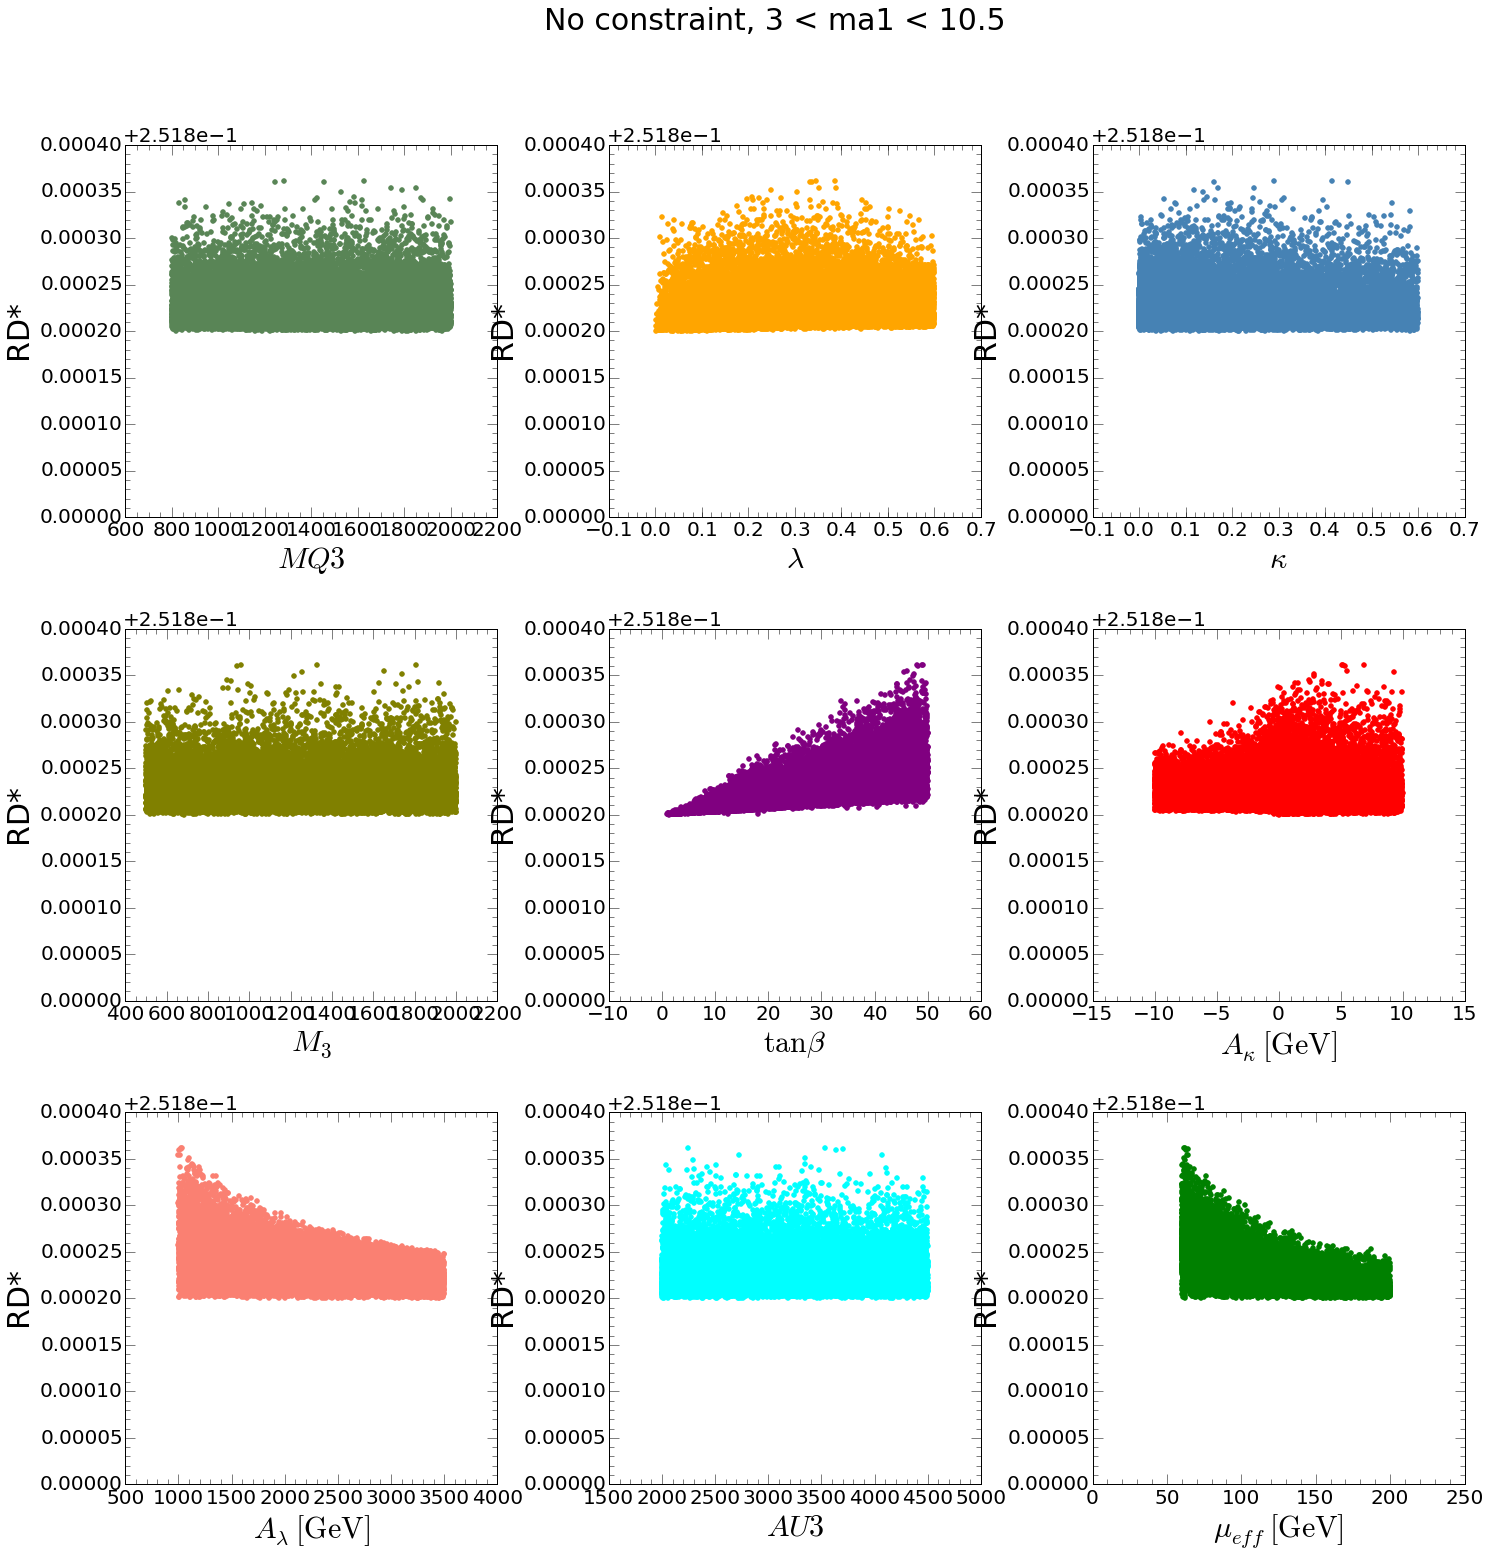

In [36]:
plot_input_params_scatters(df_orig_ma1, 
                           'rds', 'RD*', title='No constraint, 3 < ma1 < 10.5', 
                           param_dict=nmssm_params_extended, 
                           yrange=[0.2518, 0.2522])
plt.hlines([2.78E-1, 3.66E-1], *plt.xlim(), linestyle='dashed')

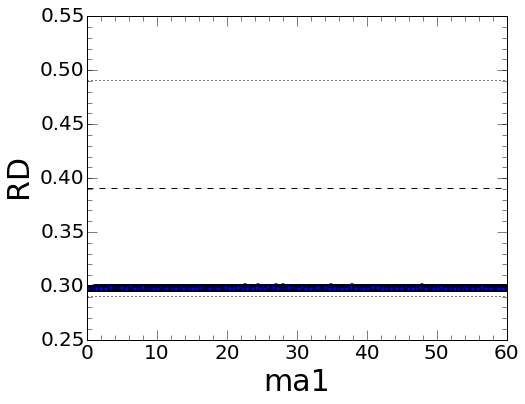

In [133]:
plot_scatter(df=df_orig, xvar='ma1', yvar='rd', ylabel='RD')
plt.xlim(0, 60)
plt.hlines([0.5*(2.91E-1+4.91E-1)], *plt.xlim(), linestyle='dashed')
plt.hlines([2.91E-1, 4.91E-1], *plt.xlim(), linestyle='dotted')

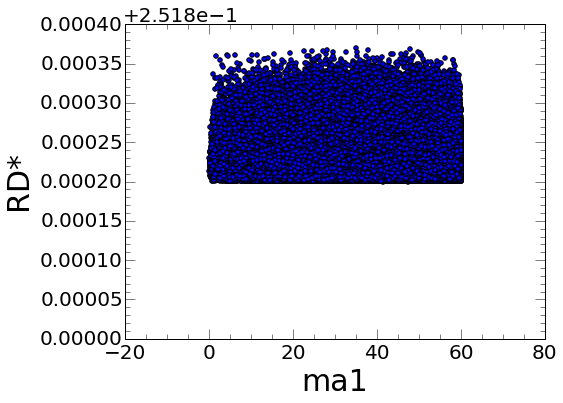

In [38]:
plot_scatter(df=df_orig, xvar='ma1', yvar='rds', ylabel='RD*')
plt.ylim(0.2518, 0.2522)
plt.hlines([2.78E-1, 3.66E-1], *plt.xlim(), linestyle='dashed')

RD(\*) is inversely dependent on charged Higgs mass.

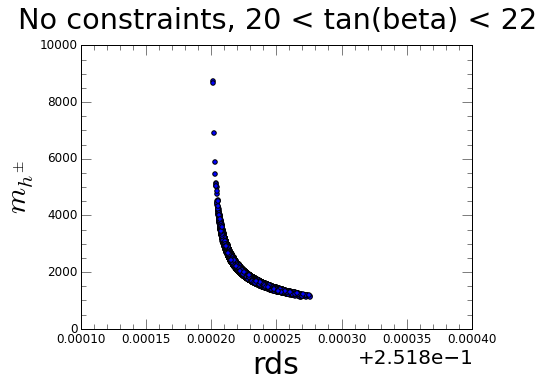

In [75]:
plot_scatter(df=df_orig.query("20<tgbeta<22"), xvar='rds', yvar='mhc', ylabel=r'$m_{h^{\pm}}$', title='No constraints, 20 < tan(beta) < 22')
plt.xlim([0.2519, 0.2522])
plt.tick_params(axis='both', which='major', labelsize=12)

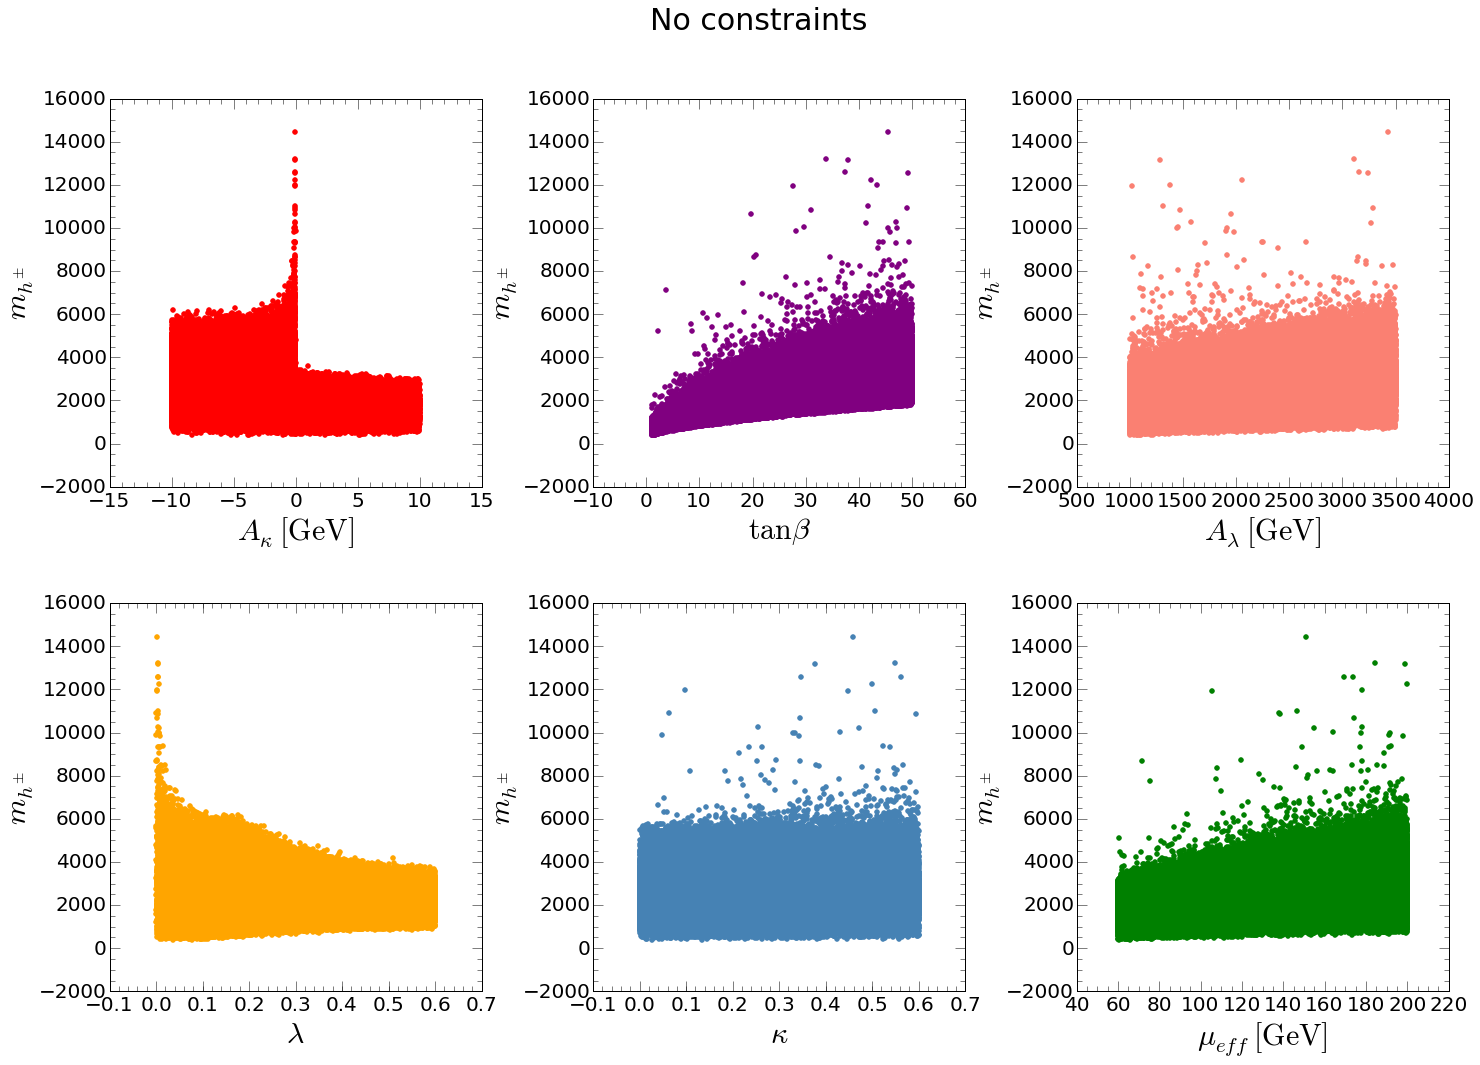

In [76]:
plot_input_params_scatters(df_orig, 'mhc', r'$m_{h^{\pm}}$', title='No constraints')

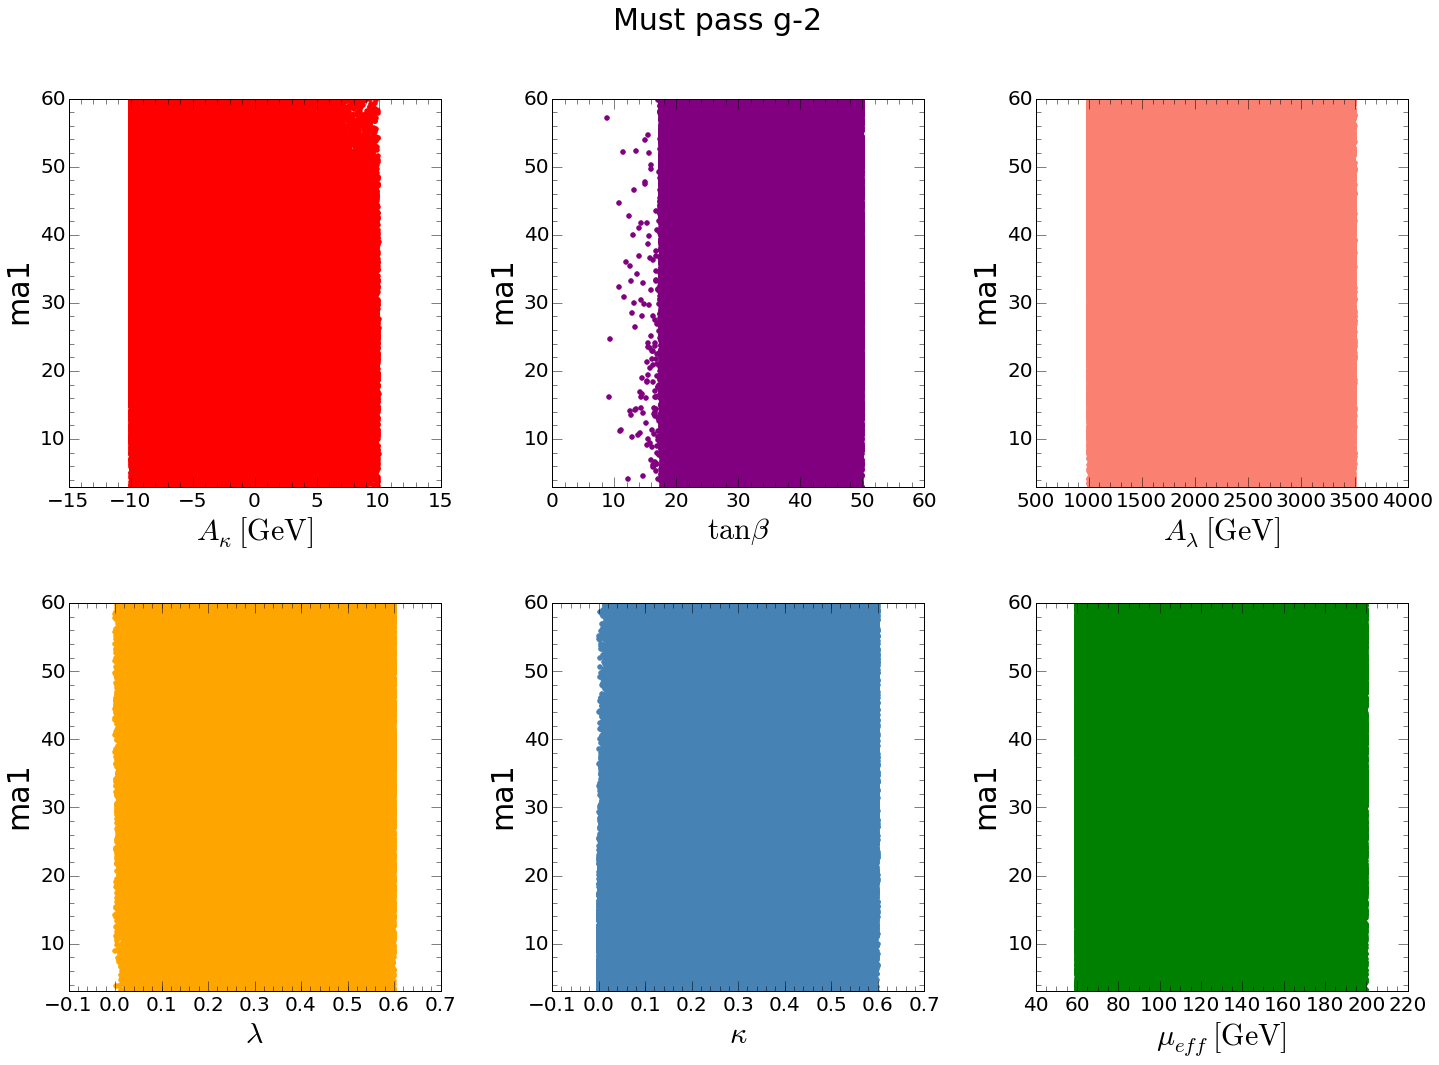

In [39]:
plot_input_params_scatters(df_orig[~df_orig.constraints.str.contains('Muon magn. mom. more than 2 sigma away')], 
                           'ma1', 'ma1', yrange=[3, 60], title='Must pass g-2')

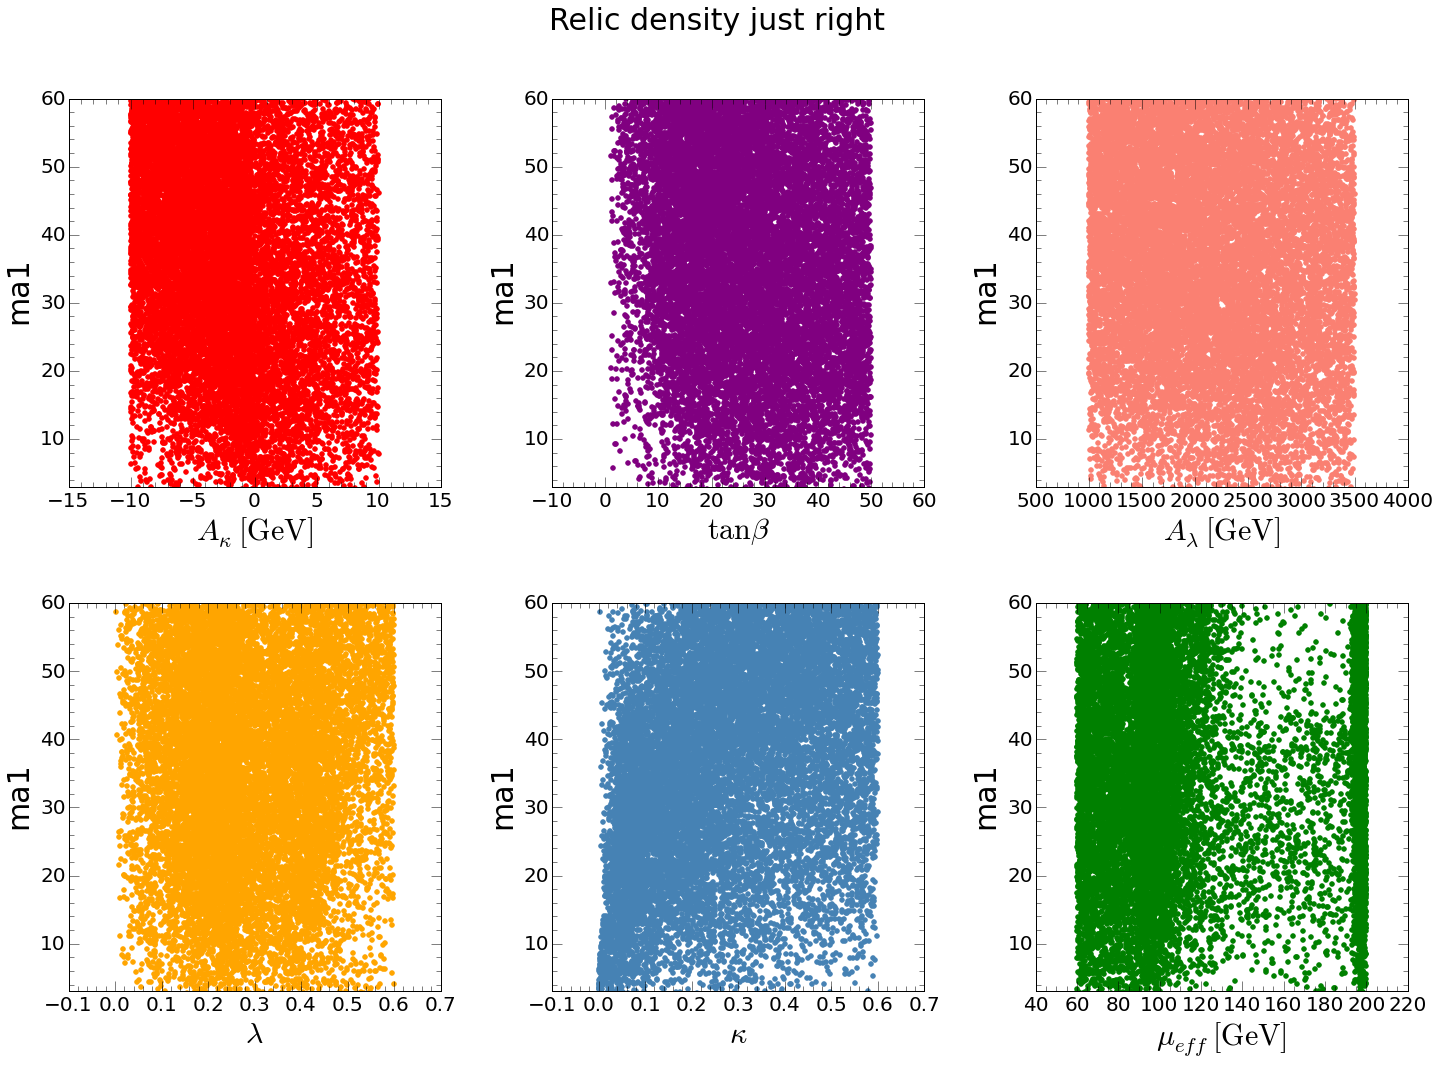

In [40]:
plot_input_params_scatters(df_orig[(~df_orig.constraints.str.contains('Relic density too small')) 
                                   & (~df_orig.constraints.str.contains('Relic density too large'))], 
                           'ma1', 'ma1', yrange=[3, 60], title='Relic density just right')

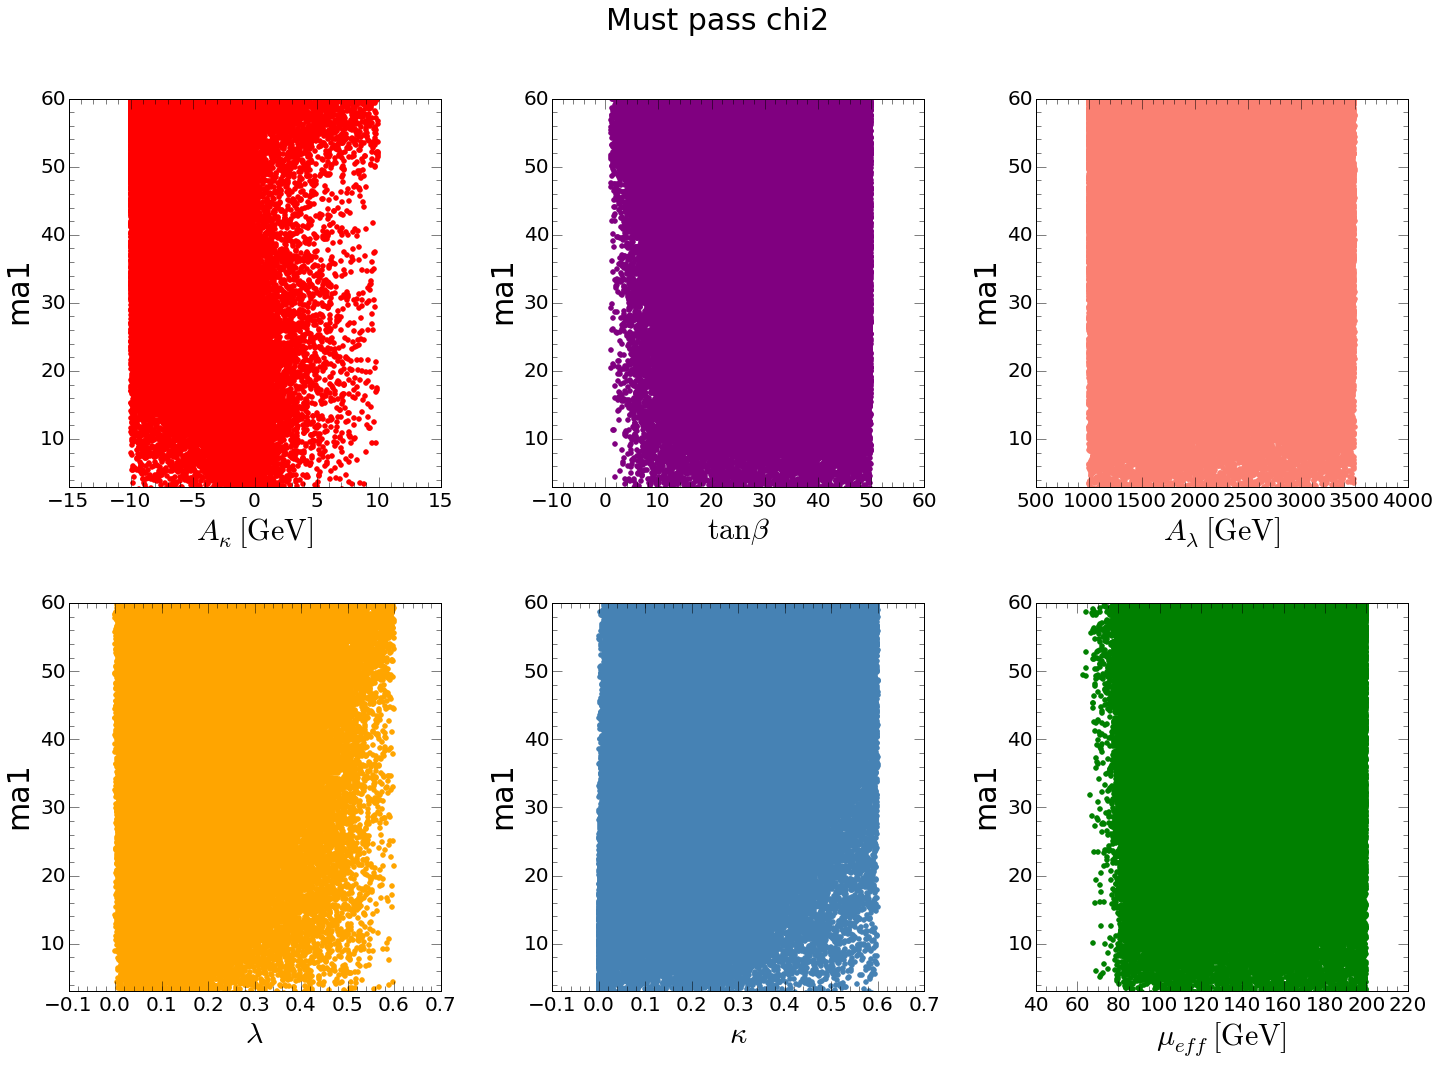

In [41]:
plot_input_params_scatters(df_orig[~df_orig.constraints.str.contains('chi2')], 
                           'ma1', 'ma1', yrange=[3, 60], title='Must pass chi2')

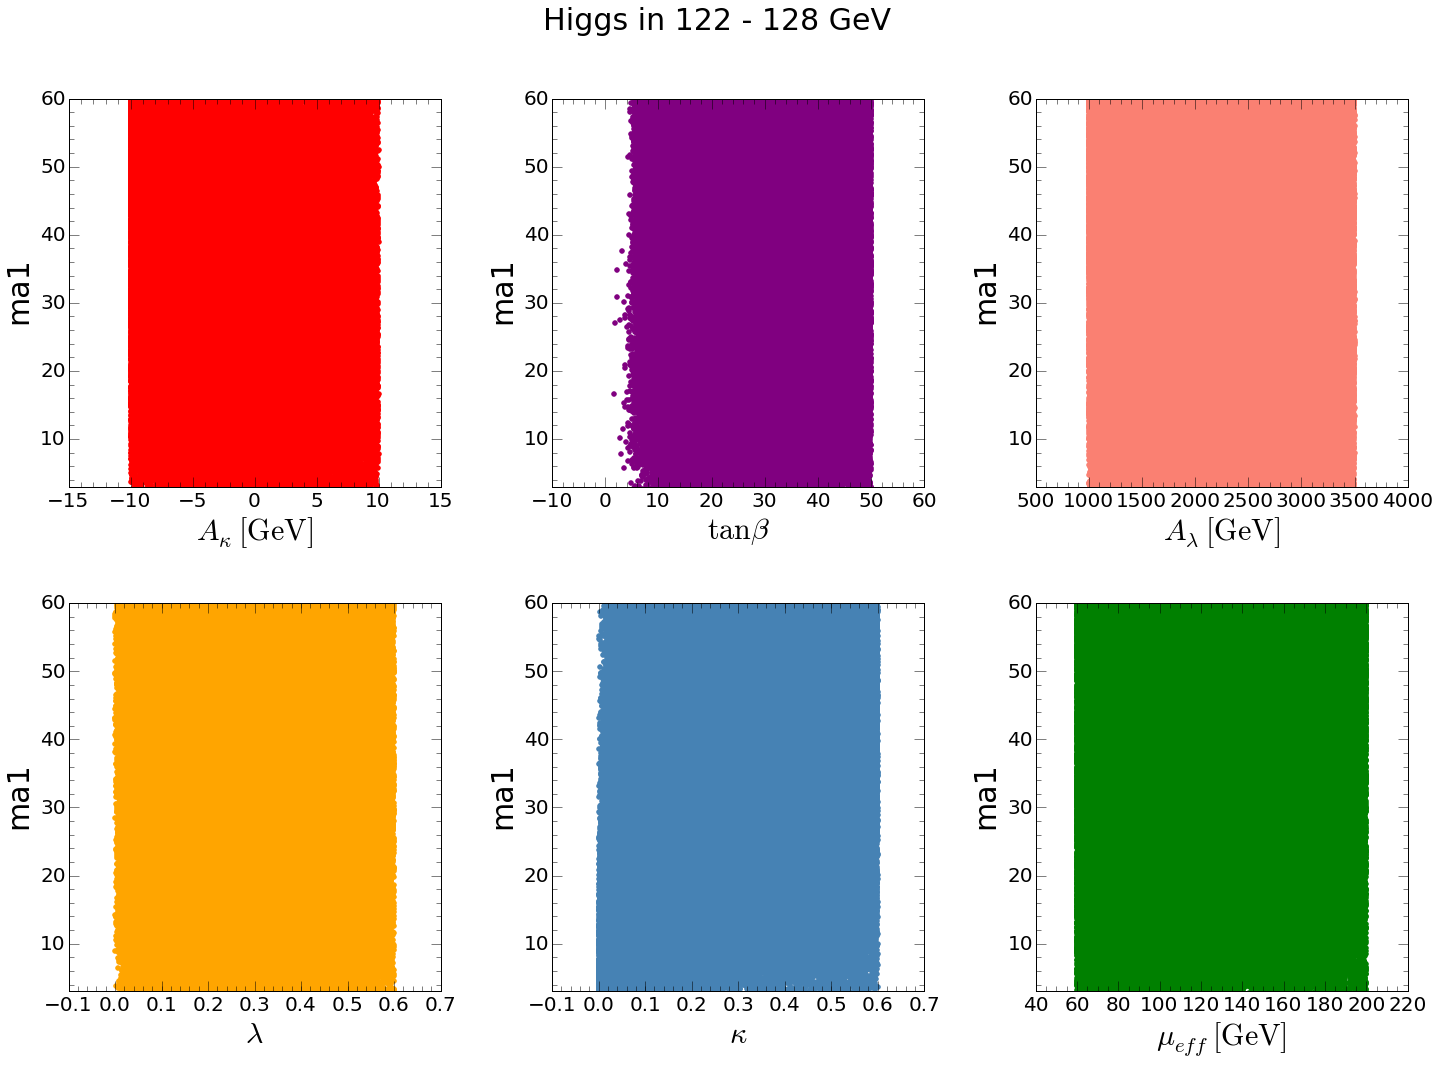

In [42]:
plot_input_params_scatters(df_orig[~df_orig.constraints.str.contains('No Higgs')], 
                           'ma1', 'ma1', yrange=[3, 60], title='Higgs in 122 - 128 GeV')

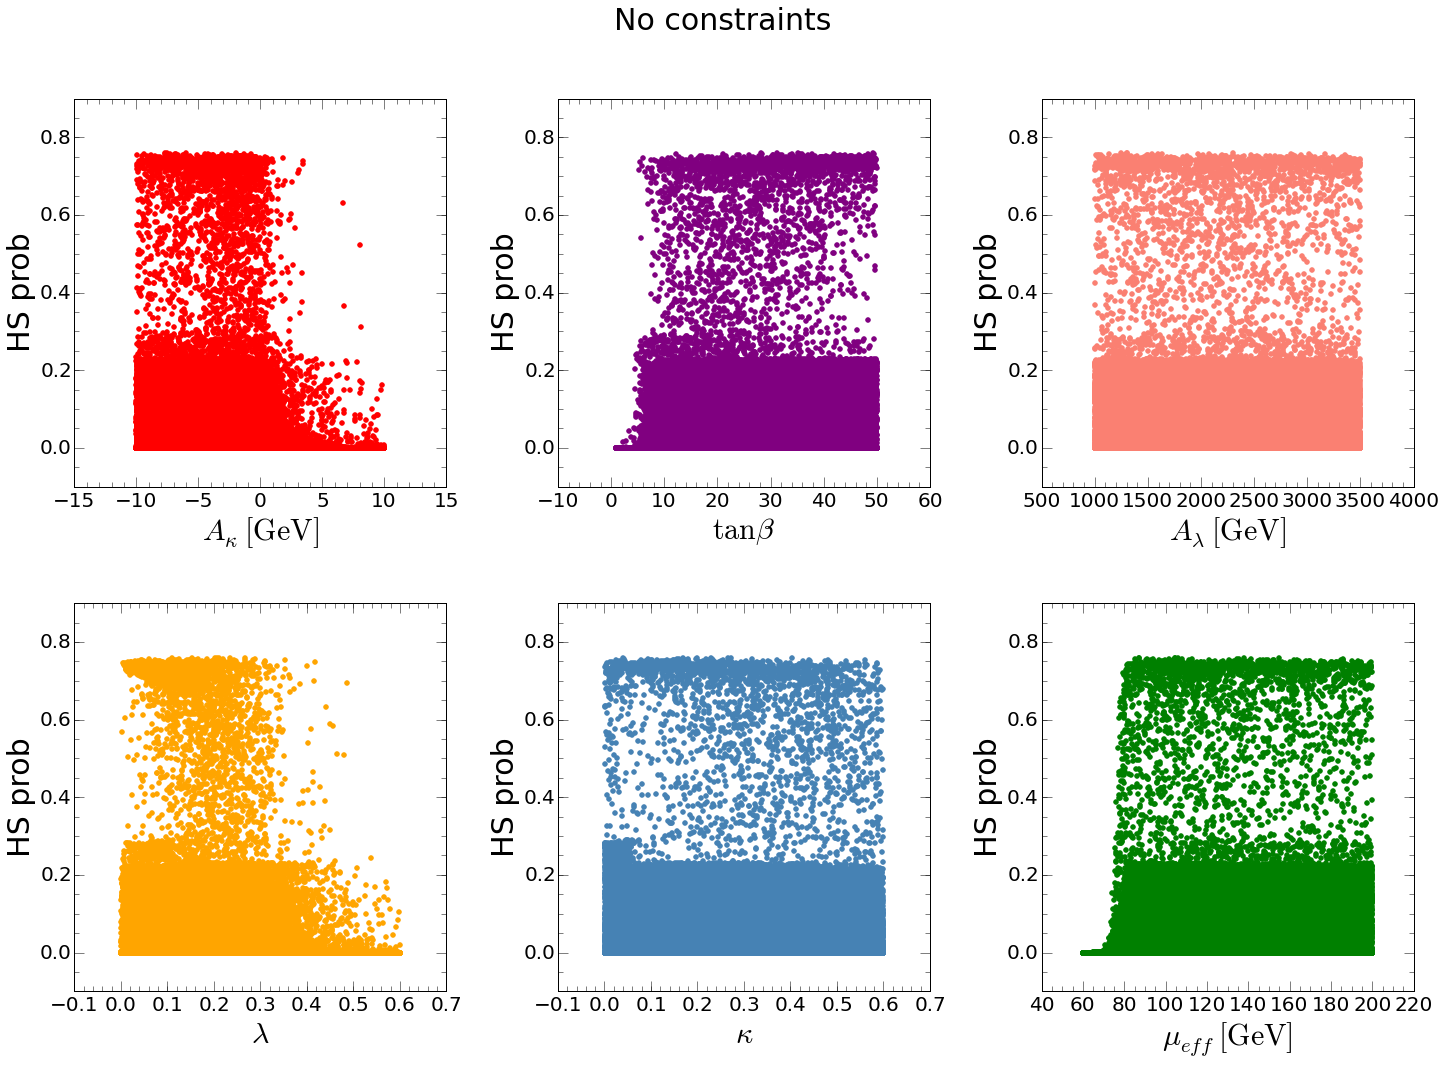

In [43]:
plot_input_params_scatters(df_orig, 
                           'HSprob', 'HS prob', title='No constraints')

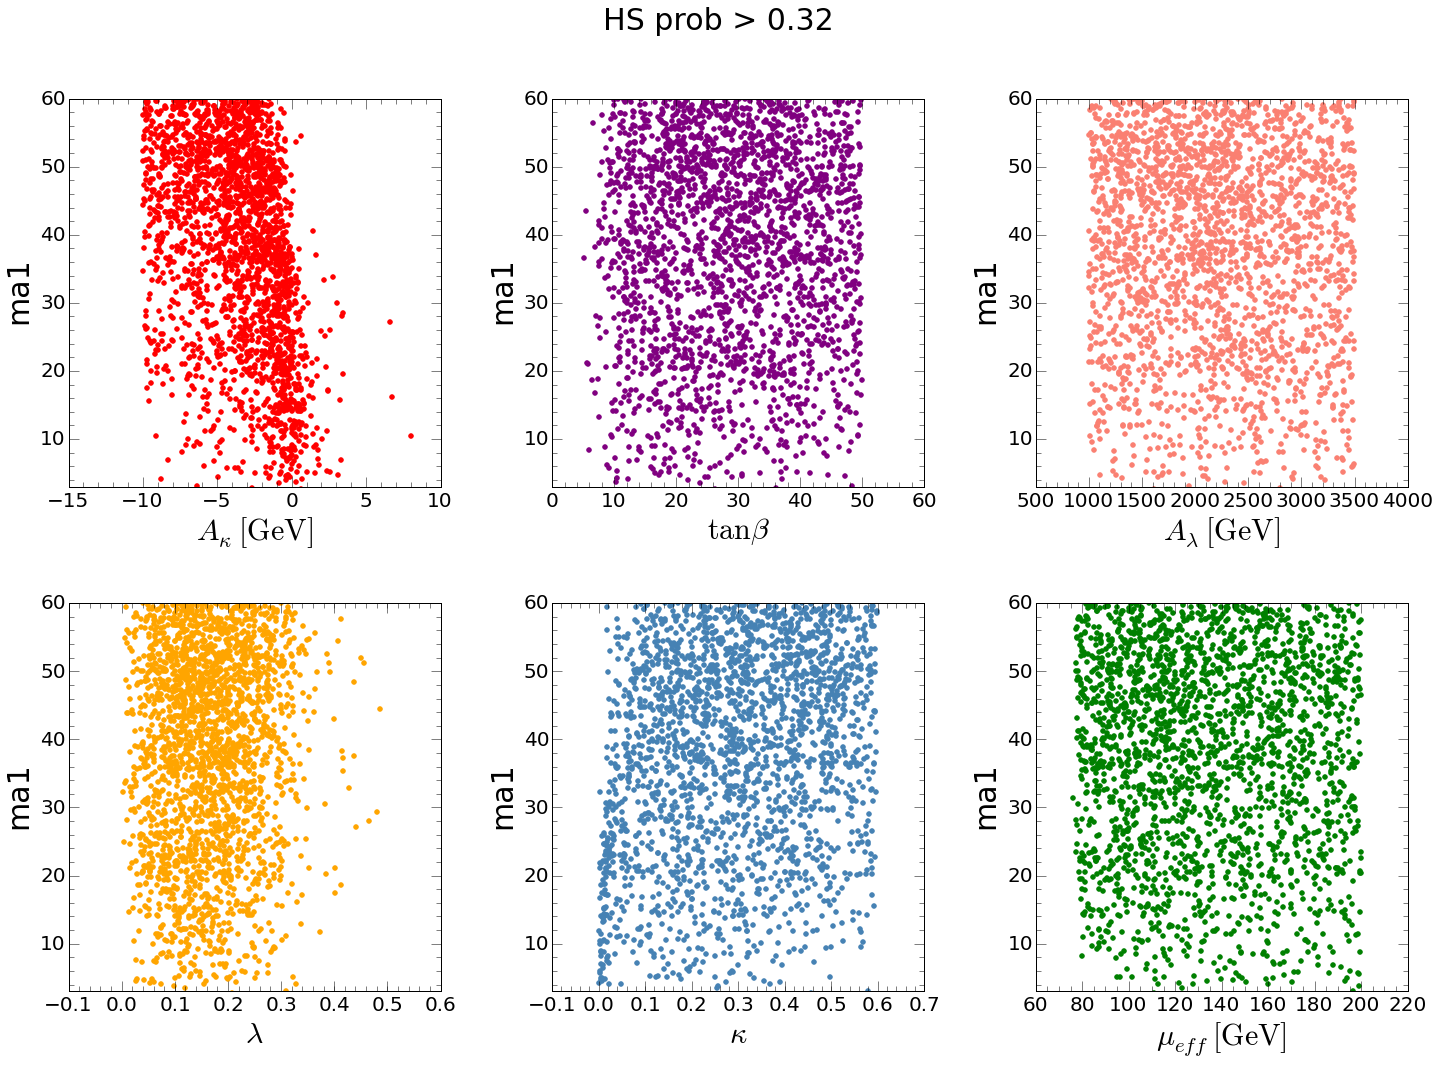

In [44]:
plot_input_params_scatters(df_orig.query('HSprob>(1-0.68)'), 
                           'ma1', 'ma1', title='HS prob > 0.32', yrange=[3,60])

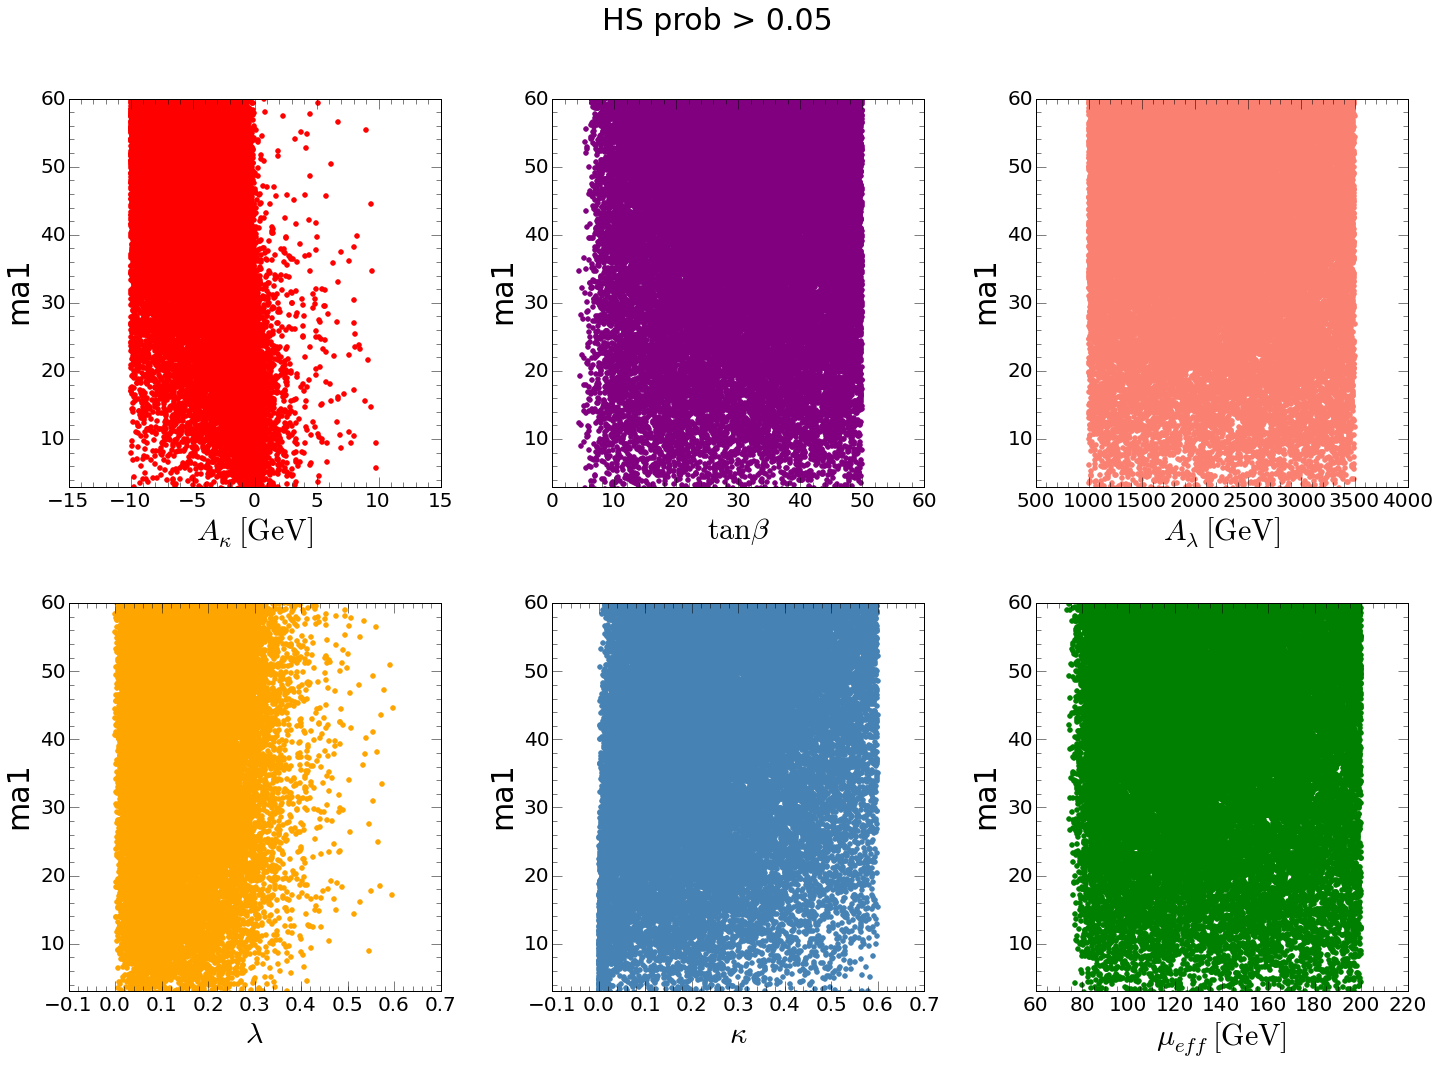

In [45]:
plot_input_params_scatters(df_orig.query('HSprob>(1-0.95)'), 
                           'ma1', 'ma1', title='HS prob > 0.05', yrange=[3,60])

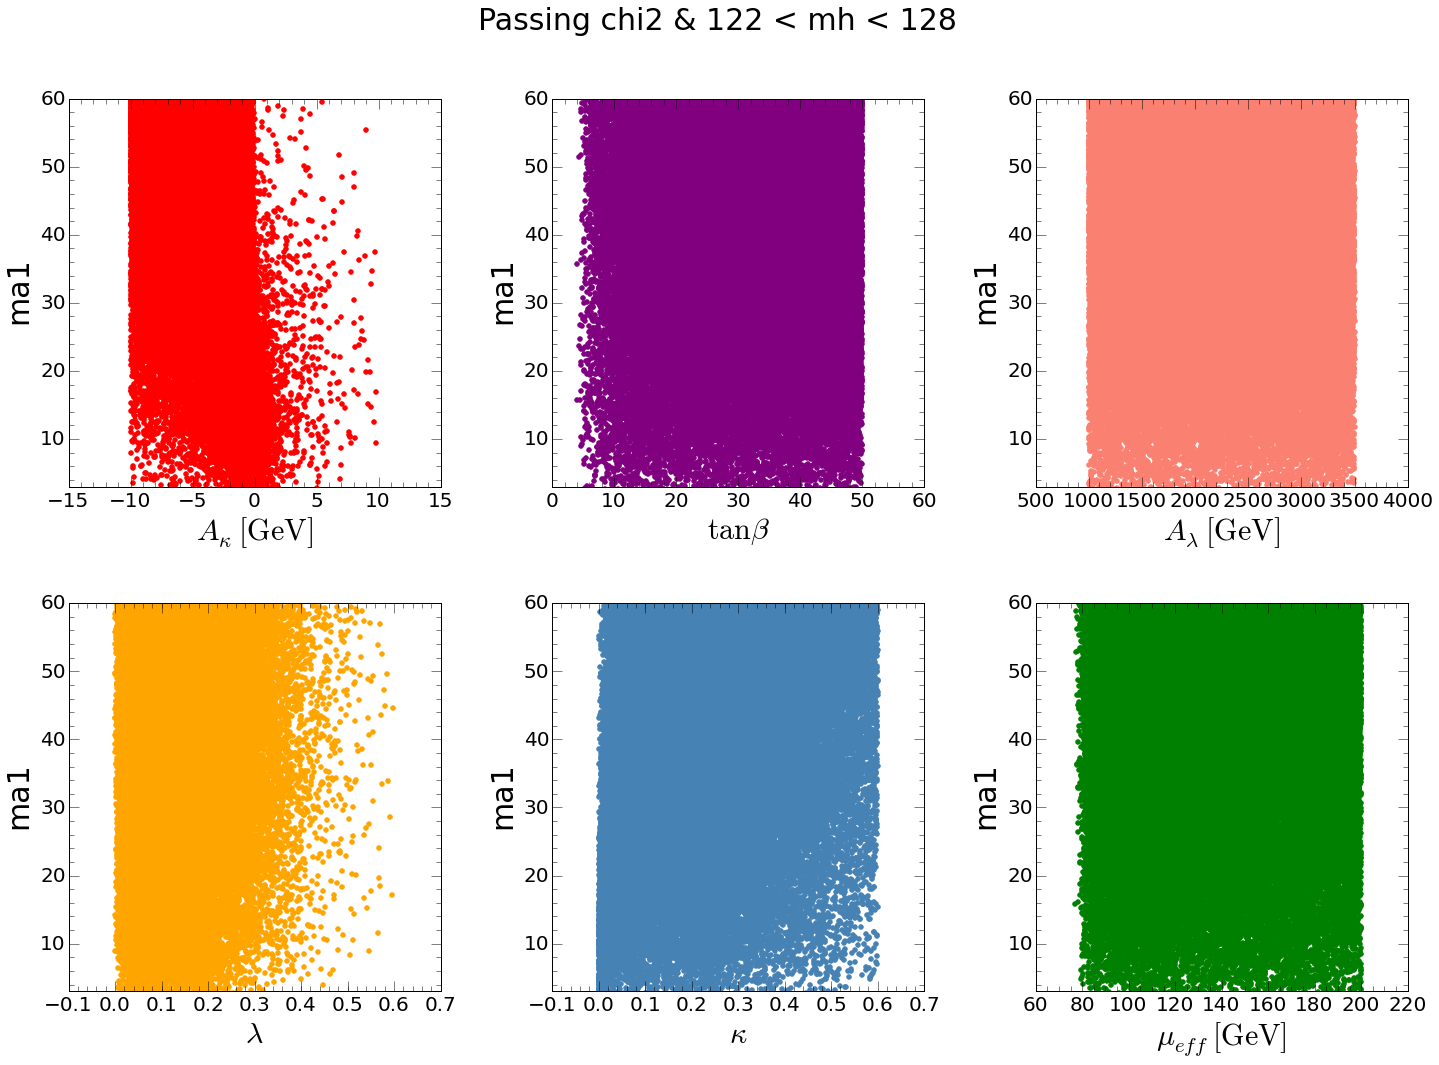

In [46]:
plot_input_params_scatters(df_orig[~(df_orig.constraints.str.contains('chi2') | df_orig.constraints.str.contains('No Higgs'))], 
                           'ma1', 'ma1', title='Passing chi2 & 122 < mh < 128', yrange=[3,60])

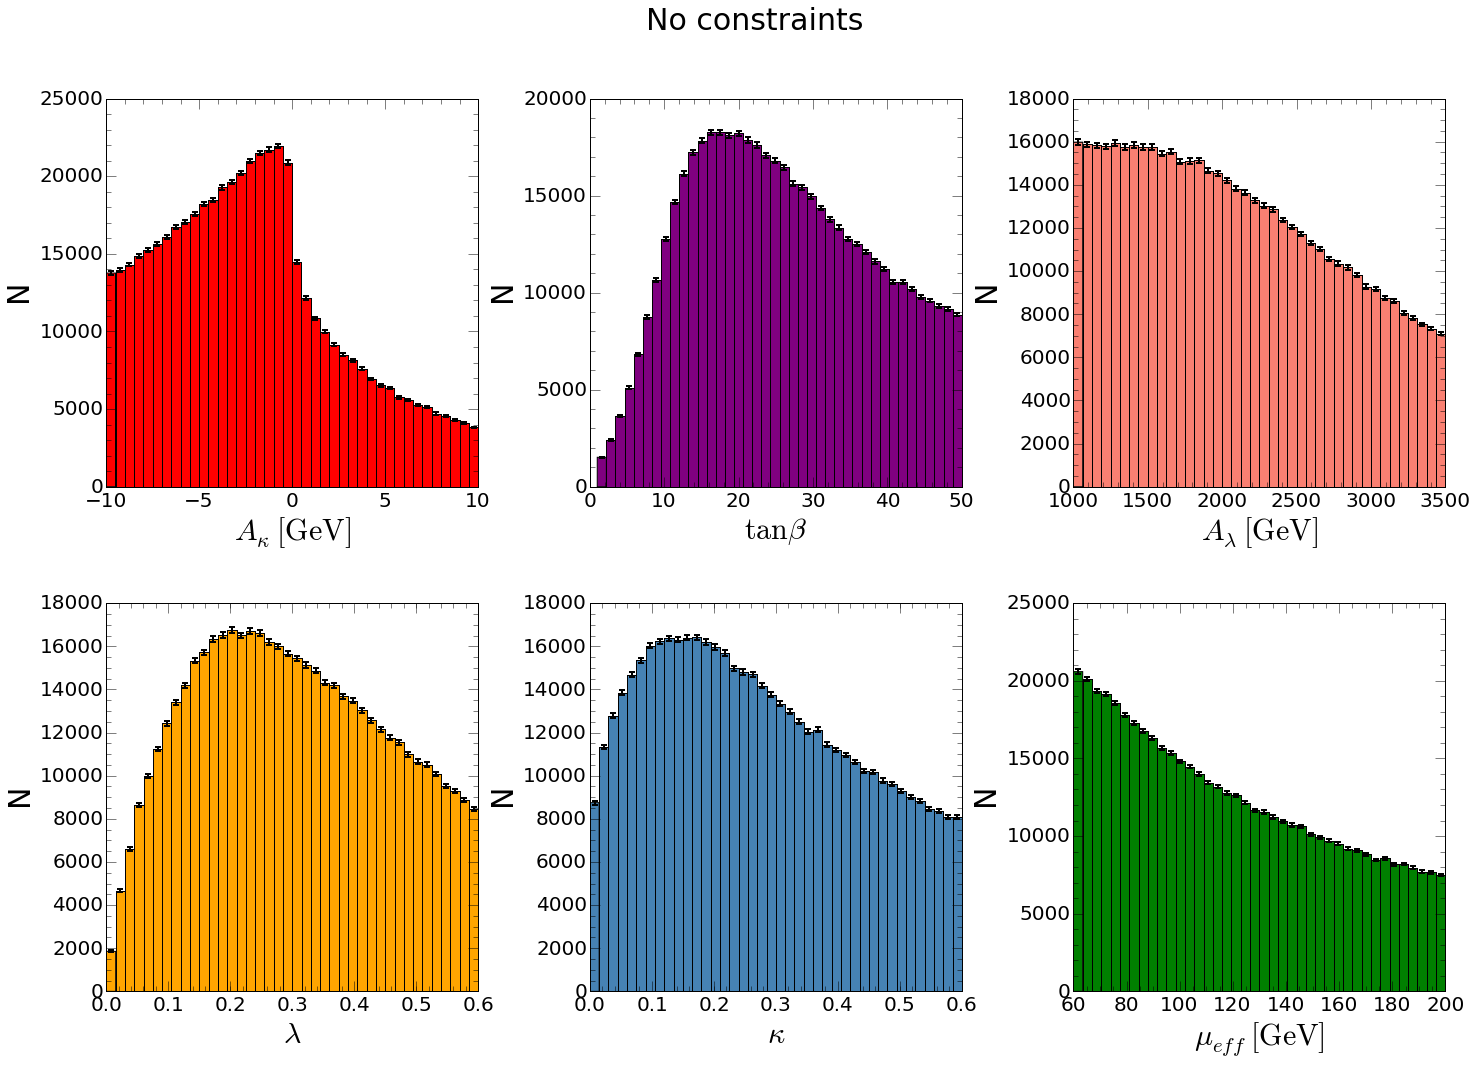

In [47]:
plot_input_params_hists(df_orig, 
                        'N', title='No constraints', bins=40)

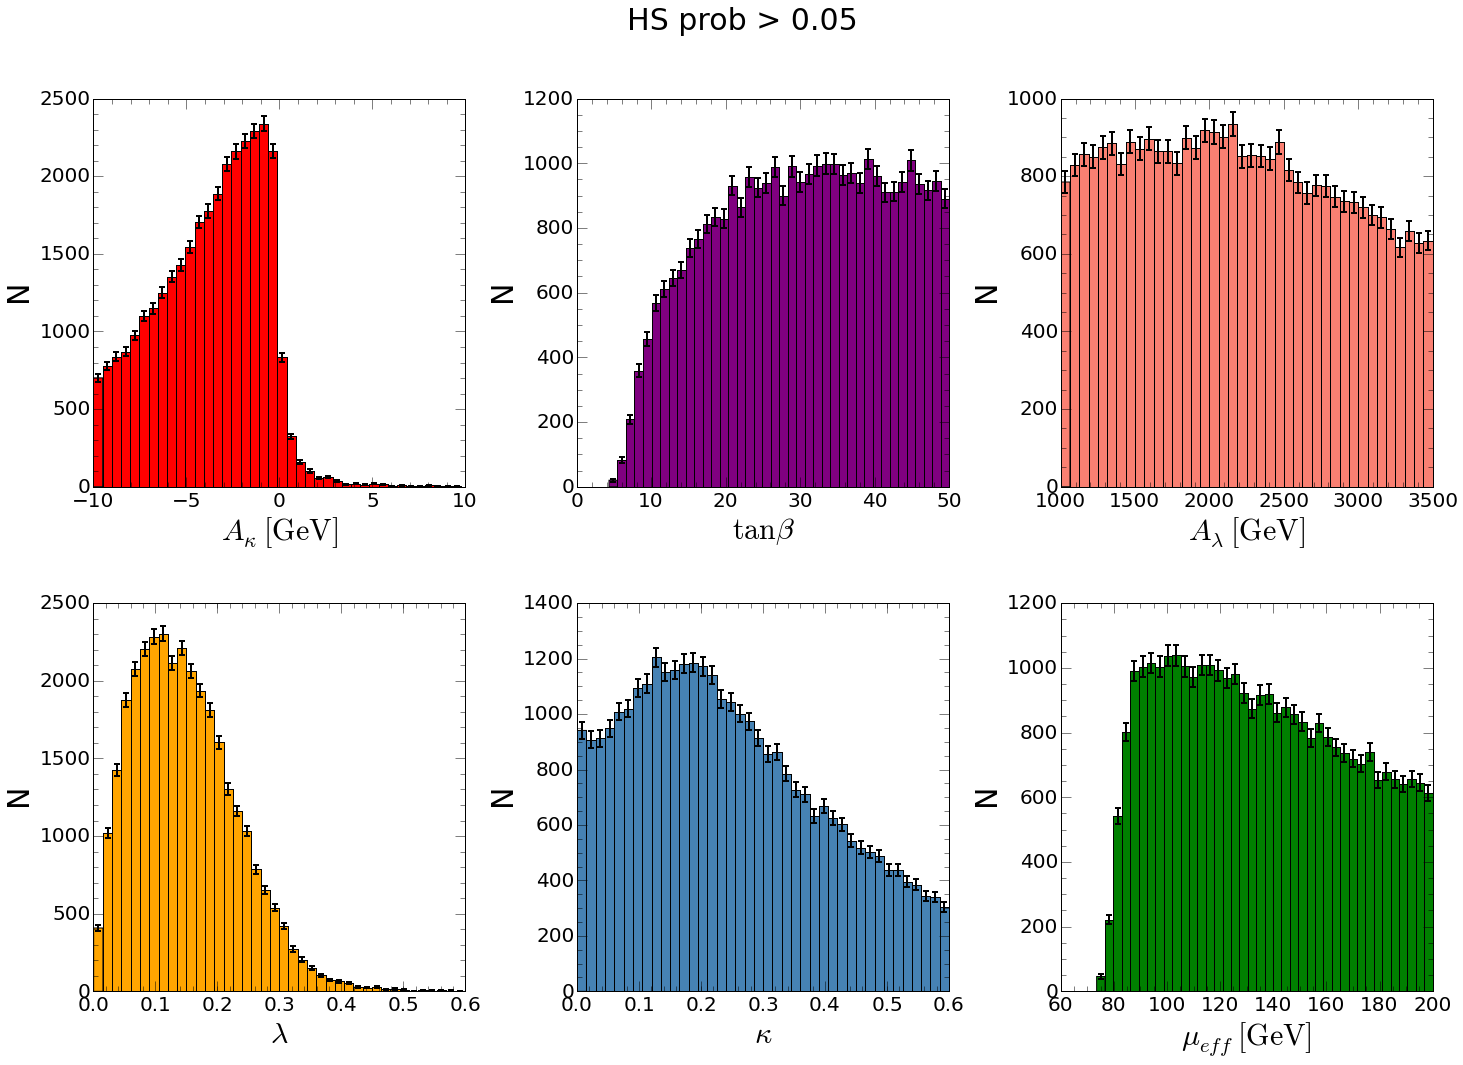

In [48]:
plot_input_params_hists(df_orig.query('HSprob>(1-0.95)'), 
                        'N', title='HS prob > 0.05', bins=40)

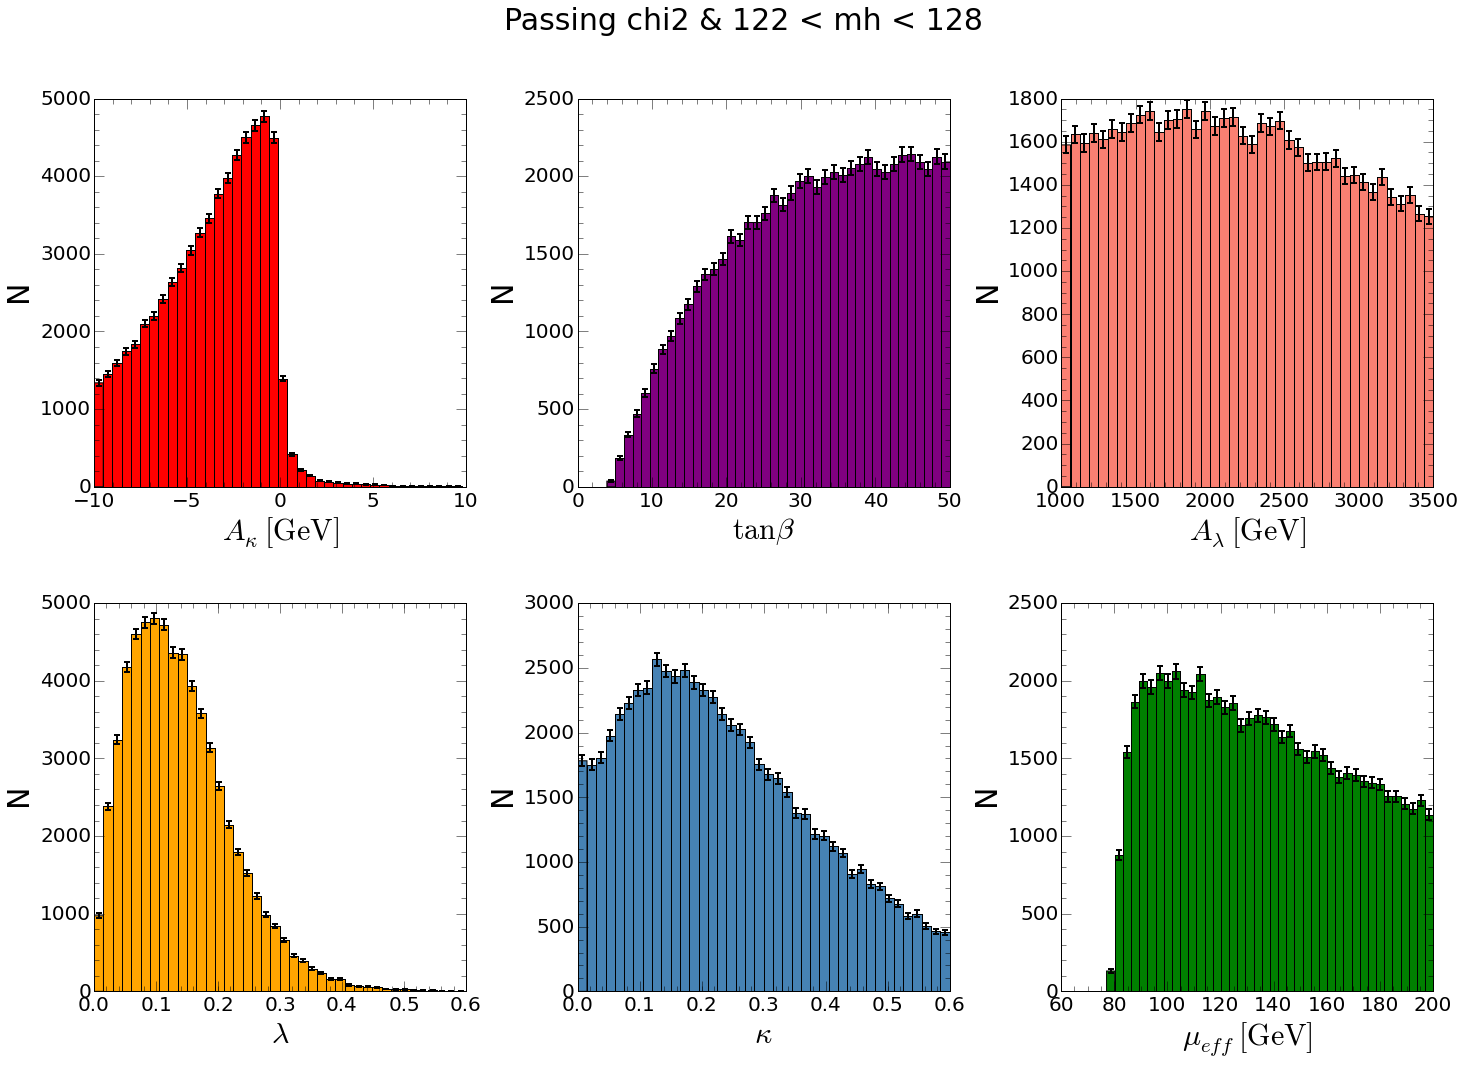

In [49]:
plot_input_params_hists(df_orig[~(df_orig.constraints.str.contains('chi2') | df_orig.constraints.str.contains('No Higgs'))], 
                        'N', title='Passing chi2 & 122 < mh < 128', bins=40)

In [50]:
print len(df_orig.query('HSprob>(1-0.95)').index), 'have HS prob > 0.05'
print len(df_orig[~df_orig.constraints.str.contains('chi2')].index), 'pass NT chi2'
print len(df_orig[~df_orig.constraints.str.contains('No Higgs')].index), 'pass 122 < mh < 128'
print len(df_orig[~(df_orig.constraints.str.contains('chi2') | 
                    df_orig.constraints.str.contains('No Higgs'))].index), 'pass NT chi2 & 122 < mh < 128'

32297 have HS prob > 0.05
105865 pass NT chi2
202531 pass 122 < mh < 128
62947 pass NT chi2 & 122 < mh < 128


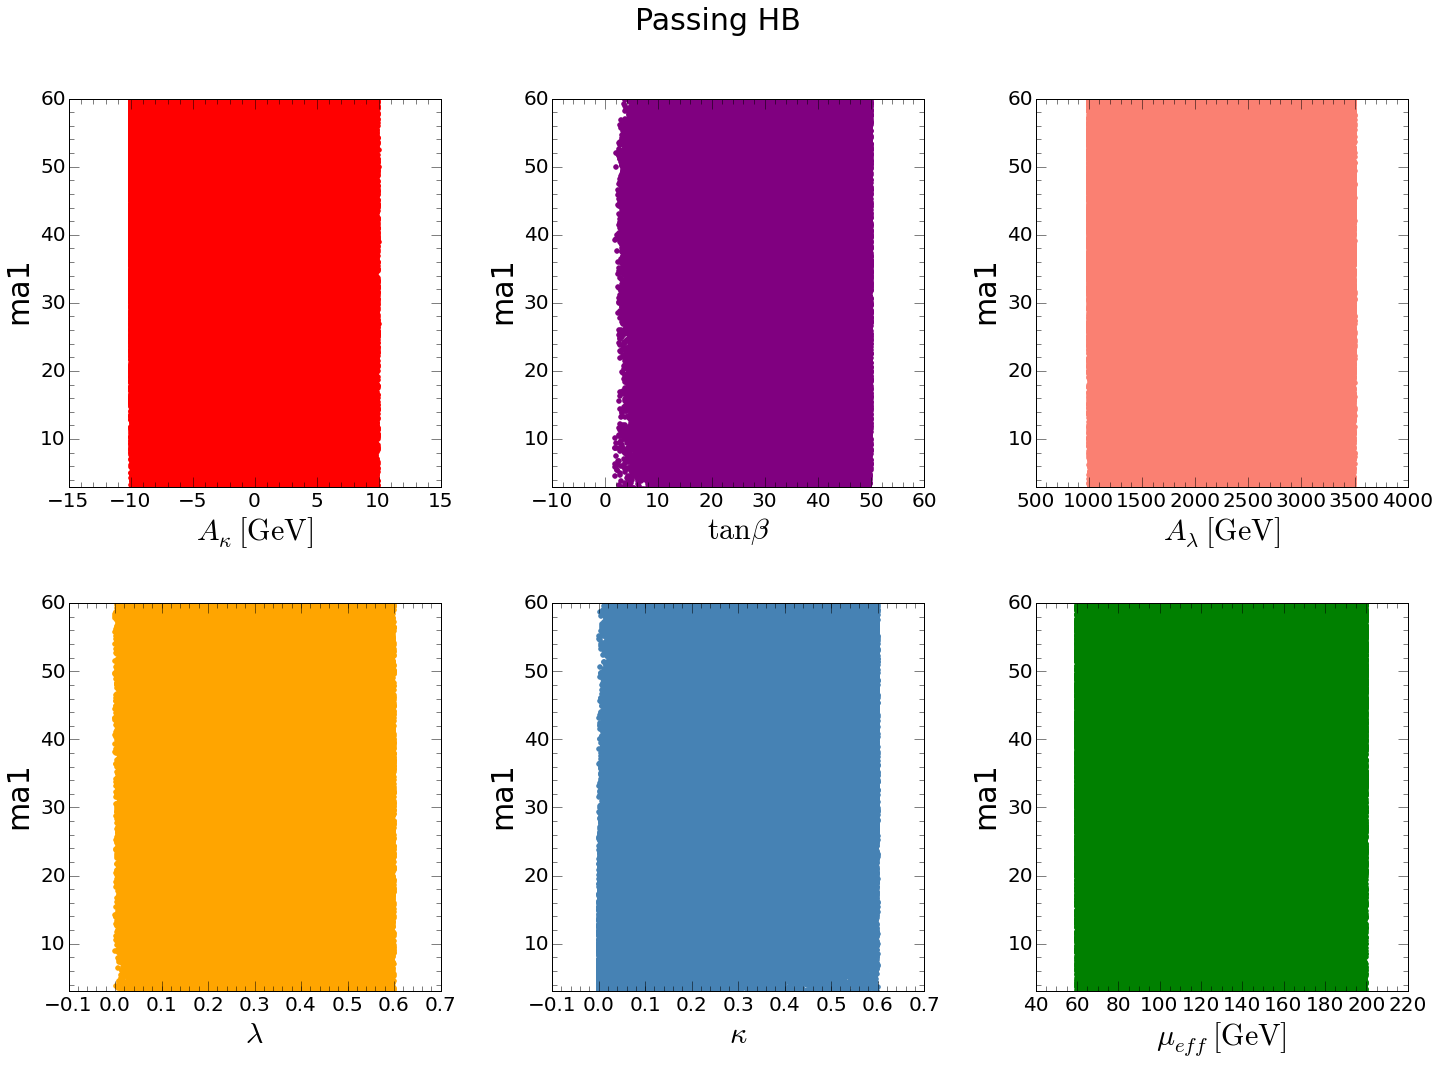

In [51]:
plot_input_params_scatters(df_orig.query('HBresult==1'), 
                           'ma1', 'ma1', title='Passing HB', yrange=[3,60])

In [52]:
no_cons = df_orig.ma1.values
chi2_mh = df_orig[~(df_orig.constraints.str.contains('chi2') | 
                    df_orig.constraints.str.contains('No Higgs'))].ma1.values
hs = df_orig.query('HSprob>(1-0.95)').ma1.values
chi2_mh_hs = df_orig[~(df_orig.constraints.str.contains('chi2') | 
                    df_orig.constraints.str.contains('No Higgs'))].query('HSprob>(1-0.95)').ma1.values

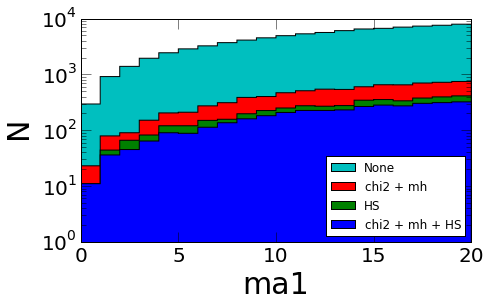

In [53]:
plt.hist([chi2_mh_hs, hs, chi2_mh, no_cons], label=['chi2 + mh + HS', 'HS', 'chi2 + mh', 'None'], 
         bins=20, range=[0,20], stacked=False, normed=False, histtype='stepfilled')
plt.yscale('log')
plt.ylim(1, 10000)
plt.legend(loc=4, fontsize=12, framealpha=1)
plt.xlabel('ma1')
plt.ylabel('N')